# Automatyczne Uczenie Maszynowe - Projekt 1

## Wiktoria Boguszewska i Mateusz Zacharecki

### Analiza i obróbka danych

Wczytanie potrzebnych bibliotek

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-optimize

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import datasets
from ucimlrepo import fetch_ucirepo

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from scipy.stats import loguniform, uniform

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Wczytanie zbiorów danych

In [5]:
cancer = datasets.load_breast_cancer()
credit = fetch_openml(data_id = 31)
blood = fetch_ucirepo(id=176)
bank = fetch_openml(data_id = 1558)

Podział danych na zmienna objaśniające i objaśniane

In [6]:
X_cancer = cancer.data
y_cancer = cancer.target
X_credit = credit.data
y_credit = credit.target
X_blood = blood.data.features
y_blood = blood.data.targets
X_bank = bank.data
y_bank  = bank.target

In [7]:
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
print("Unique values in y_cancer:", np.unique(y_cancer))

Unique values in y_cancer: [0 1]


In [9]:
X_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [10]:
print("Unique values in y_credit:", np.unique(y_credit))

Unique values in y_credit: ['bad' 'good']


In [11]:
y_credit = y_credit.replace({'bad': 0, 'good': 1})

print("Unique values in y_credit after conversion:", np.unique(y_credit))

Unique values in y_credit after conversion: [0 1]


In [12]:
X_blood

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [13]:
print("Unique values in y_blood:", np.unique(y_blood))

Unique values in y_blood: [0 1]


In [14]:
X_bank

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30.0,jul,329.0,5.0,-1.0,0.0,unknown
4517,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9.0,may,153.0,1.0,-1.0,0.0,unknown
4518,57.0,technician,married,secondary,no,295.0,no,no,cellular,19.0,aug,151.0,11.0,-1.0,0.0,unknown
4519,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6.0,feb,129.0,4.0,211.0,3.0,other


In [15]:
print("Unique values in y_bank:", np.unique(y_bank))

Unique values in y_bank: ['1' '2']


In [16]:
y_bank = y_bank.replace({'1': 0, '2': 1})

print("Unique values in y_bank after conversion:", np.unique(y_bank))

Unique values in y_bank after conversion: [0 1]


Sprawdzenie liczby wierszy

In [14]:
len(X_cancer)

569

In [15]:
len(X_credit)

1000

In [16]:
len(X_blood)

748

In [17]:
len(X_bank)

4521

Sprawdzenie typw zmiennych

In [18]:
X_cancer.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [19]:
X_credit.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object

In [20]:
X_blood.dtypes

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
dtype: object

In [21]:
X_bank.dtypes

V1      float64
V2     category
V3     category
V4     category
V5     category
V6      float64
V7     category
V8     category
V9     category
V10     float64
V11    category
V12     float64
V13     float64
V14     float64
V15     float64
V16    category
dtype: object

Sprawdzenie braków danych

In [22]:
X_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [23]:
X_credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

In [24]:
X_blood.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
dtype: int64

In [25]:
X_bank.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
dtype: int64

Nie mamy żadnych braków danych.

#### Tworzenie pipelinów

In [26]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

Pipeliny:

In [27]:
preprocessor_cancer = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, make_column_selector(dtype_include = np.number)),
    ('categorical', categorical_transformer, make_column_selector(dtype_include = np.object_))
])

pipeline_log = Pipeline([
    ('pre', preprocessor_cancer),
    ('classifier', LogisticRegression())
])

pipeline_knn = Pipeline([
    ('pre', preprocessor_cancer),
    ('classifier', KNeighborsClassifier())
])

pipeline_xgb = Pipeline([
    ('pre', preprocessor_cancer),
    ('classifier', XGBClassifier())
])

#### Siatki hiperparametrów dla RandomizedSearch:

In [28]:
log_params = {
    'classifier__penalty': ['elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__C': loguniform(1e-10, 1e+10),
    'classifier__l1_ratio': uniform(0, 1)
}

knn_params = {
    'classifier__n_neighbors': list(range(1, 31)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

xgb_params = {
    'classifier__booster': ['gbtree', 'gblinear', 'dart'],
    'classifier__eta': loguniform(1e-10, 1),
    'classifier__n_estimators': list(range(1, 501)),
    'classifier__max_depth': list(range(1, 11)),
    'classifier__subsample': uniform(0.1, 1),
    'classifier__colsample_bytree': uniform(0, 1),
    'classifier__colsample_bylevel': uniform(0, 1),
    'classifier__lambda': loguniform(1e-5, 1e+2),
    'classifier__alpha': loguniform(1e-5, 1e+2),
    'classifier__min_child_weight': loguniform(1, 1e+7)
}

#### Siatki hiperparametrów dla BayesianSearch:

In [29]:
bayes_log_params = {
    'classifier__penalty': Categorical(['elasticnet']),
    'classifier__solver': Categorical(['saga']),
    'classifier__C': Real(1e-10, 1e+10, prior='log-uniform'),
    'classifier__l1_ratio': Real(0, 1, prior='uniform')
}
    
bayes_knn_params = {
    'classifier__n_neighbors': Integer(1, 30),
    'classifier__weights': Categorical(['uniform', 'distance']),
    'classifier__p': Categorical([1, 2])
}
    
bayes_xgb_params = {
    'classifier__booster': Categorical(['gbtree', 'gblinear', 'dart']),
    'classifier__eta': Real(1e-10, 1, prior='log-uniform'),
    'classifier__n_estimators': Integer(1, 500),
    'classifier__max_depth': Integer(1, 10),
    'classifier__subsample': Real(0.1, 1, prior='uniform'),
    'classifier__colsample_bytree': Real(0, 1, prior='uniform'),
    'classifier__colsample_bylevel': Real(0, 1, prior='uniform'),
    'classifier__lambda': Real(1e-5, 1e+2, prior='log-uniform'),
    'classifier__alpha': Real(1e-5, 1e+2, prior='log-uniform'),
    'classifier__min_child_weight': Real(1, 1e+7, prior='log-uniform')
}

#### Siatki hiperparametrów dla BayesianSearch:

In [53]:
grid_log_params = {
    'classifier__penalty': ['elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__C': [1e-10, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1e3, 1e5, 1e10],
    'classifier__l1_ratio': [0, 0.2, 0.6, 0.9, 1]
}

grid_knn_params = {
    'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
    'classifier__weights': ['uniform', 'distance']
}

grid_xgb_params = {
    'classifier__eta': [1e-3, 1e-2, 1e-1, 0.3, 0.5],  # 5 wartości
    'classifier__n_estimators': [50, 100, 200, 300, 400],  # 5 wartości
    'classifier__max_depth': [5, 10],  # 5 wartości
}

#### Podział danych na treningowe i testowe

In [31]:
# Zbiór cancer:

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size = 0.2, random_state = 123)

# Zbiór credit:

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size = 0.2, random_state = 123)

# Zbiór blood:

X_train_blood, X_test_blood, y_train_blood, y_test_blood = train_test_split(X_blood, y_blood, test_size = 0.2, random_state = 123)

# Zbiór bank:

X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size = 0.2, random_state = 123)

## Modele:

In [32]:
# Podział, który będzie używany przez wszystkie modele:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)
SCORING = 'accuracy'

### RandomizedSearch:

#### Regresja logistyczna

In [35]:
# Zbiór cancer:
log_cv = RandomizedSearchCV(
    pipeline_log,
    param_distributions=log_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

log_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", log_cv.best_params_)
print("Best CV Score:", np.round(log_cv.best_score_, 4))

log_random_cancer_best_scores = np.maximum.accumulate(log_cv.cv_results_['mean_test_score'])
log_random_cancer_improvements = np.diff(log_random_cancer_best_scores)
log_random_cancer_scores = log_cv.cv_results_['mean_test_score']
log_random_cancer_params = log_cv.cv_results_['params']
log_random_cancer_best_score = log_cv.best_score_

y_pred = log_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_random_cancer = pd.DataFrame({'params': log_random_cancer_params, 'scores': log_random_cancer_scores})
log_random_cancer.to_csv("log_random_cancer.csv", index = False)

Best Params: {'classifier__C': 2.4530273206373816, 'classifier__l1_ratio': 0.6128945257629677, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.9736
Test Accuracy: 0.9825


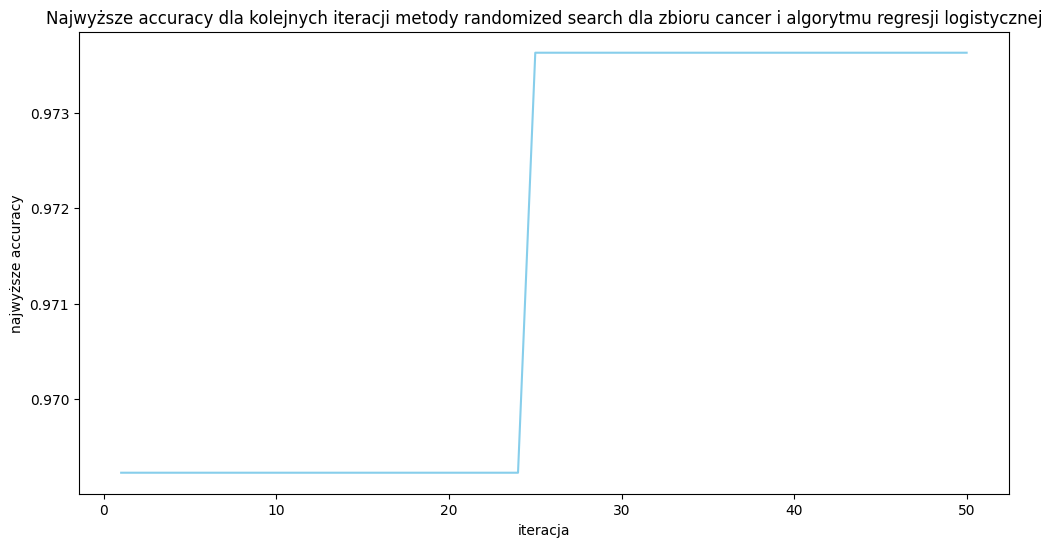

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_random_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

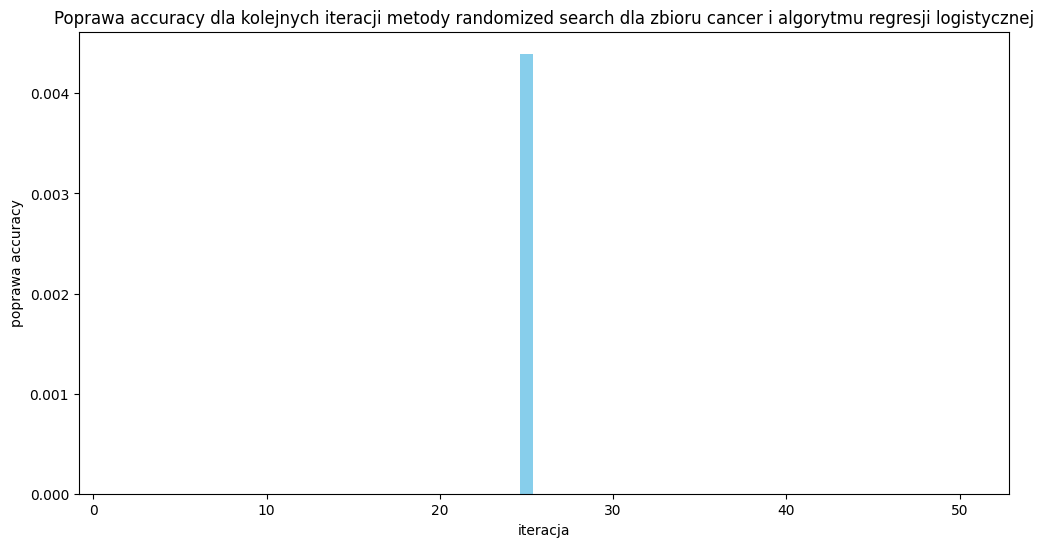

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_random_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [38]:
# Zbiór credit:
log_cv = RandomizedSearchCV(
    pipeline_log,
    param_distributions=log_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

log_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", log_cv.best_params_)
print("Best CV Score:", np.round(log_cv.best_score_, 4))

log_random_credit_best_scores = np.maximum.accumulate(log_cv.cv_results_['mean_test_score'])
log_random_credit_improvements = np.diff(log_random_credit_best_scores)
log_random_credit_scores = log_cv.cv_results_['mean_test_score']
log_random_credit_params = log_cv.cv_results_['params']
log_random_credit_best_score = log_cv.best_score_

y_pred = log_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_random_credit = pd.DataFrame({'params': log_random_credit_params, 'scores': log_random_credit_scores})
log_random_credit.to_csv("log_random_credit.csv", index = False)

Best Params: {'classifier__C': 0.4155641069593643, 'classifier__l1_ratio': 0.3921175181941505, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.7175
Test Accuracy: 0.68


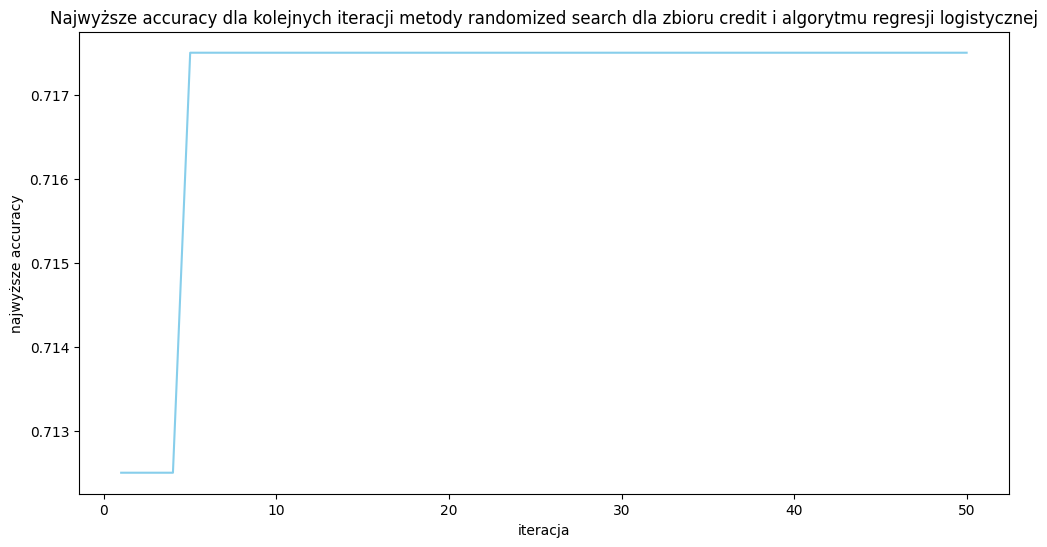

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_random_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

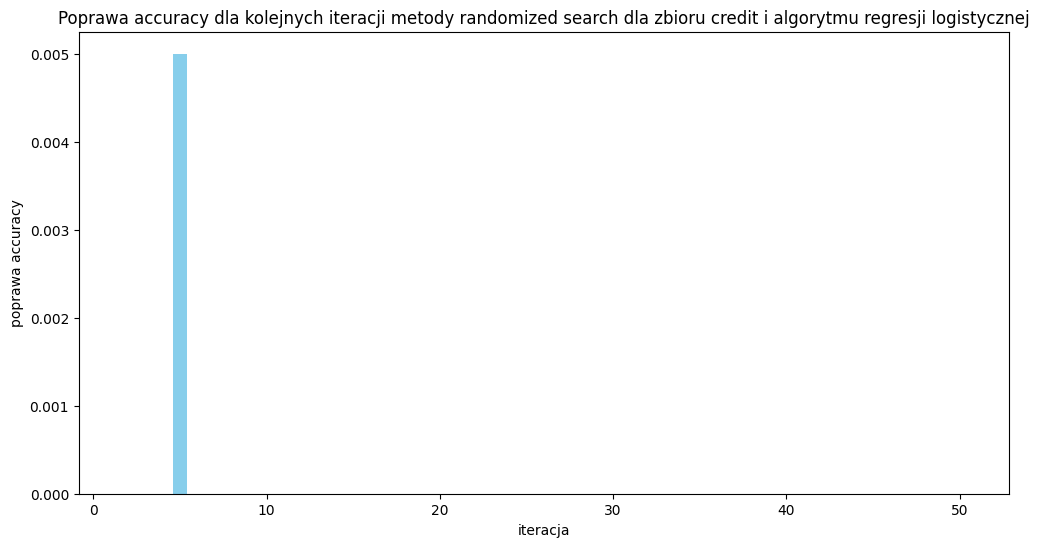

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_random_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [41]:
# Zbiór blood:
log_cv = RandomizedSearchCV(
    pipeline_log,
    param_distributions=log_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

log_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", log_cv.best_params_)
print("Best CV Score:", np.round(log_cv.best_score_, 4))

log_random_blood_best_scores = np.maximum.accumulate(log_cv.cv_results_['mean_test_score'])
log_random_blood_improvements = np.diff(log_random_blood_best_scores)
log_random_blood_scores = log_cv.cv_results_['mean_test_score']
log_random_blood_params = log_cv.cv_results_['params']
log_random_blood_best_score = log_cv.best_score_

y_pred = log_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_random_blood = pd.DataFrame({'params': log_random_blood_params, 'scores': log_random_blood_scores})
log_random_blood.to_csv("log_random_blood.csv", index = False)

Best Params: {'classifier__C': 73.03622724981692, 'classifier__l1_ratio': 0.6917017987001771, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.7843
Test Accuracy: 0.72


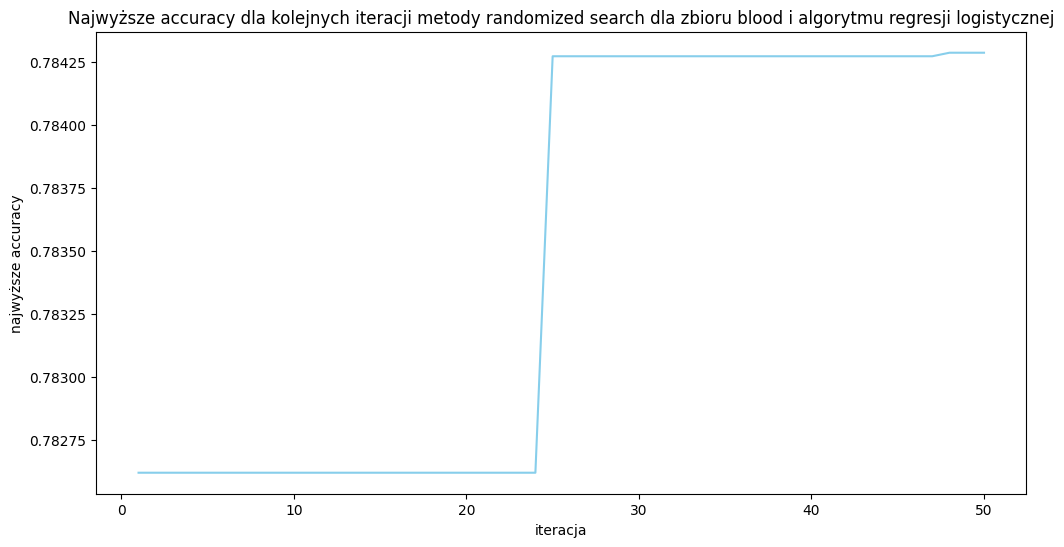

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_random_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

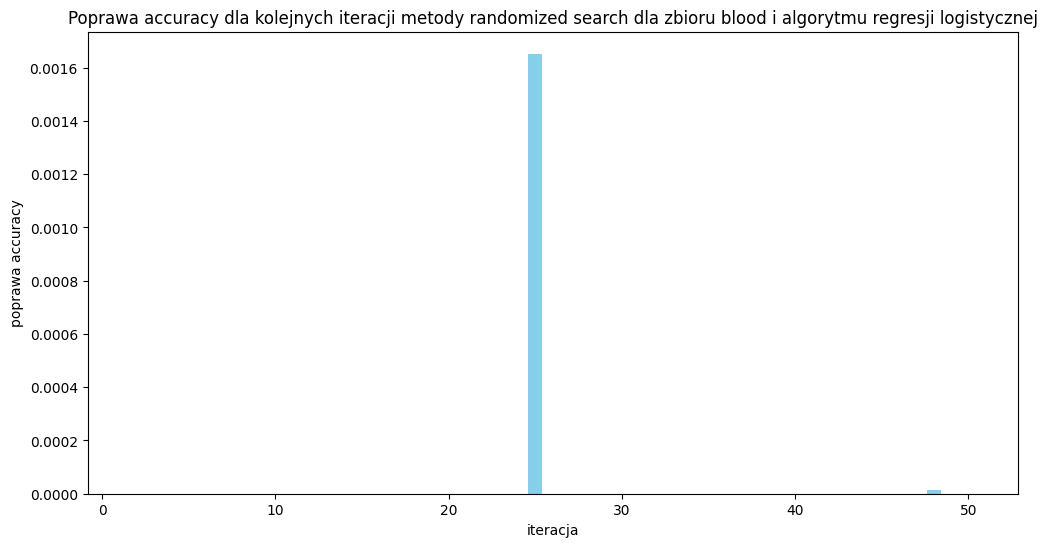

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_random_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [44]:
# Zbiór bank:
log_cv = RandomizedSearchCV(
    pipeline_log,
    param_distributions=log_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

log_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", log_cv.best_params_)
print("Best CV Score:", np.round(log_cv.best_score_, 4))

log_random_bank_best_scores = np.maximum.accumulate(log_cv.cv_results_['mean_test_score'])
log_random_bank_improvements = np.diff(log_random_bank_best_scores)
log_random_bank_scores = log_cv.cv_results_['mean_test_score']
log_random_bank_params = log_cv.cv_results_['params']
log_random_bank_best_score = log_cv.best_score_

y_pred = log_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_random_bank = pd.DataFrame({'params': log_random_bank_params, 'scores': log_random_bank_scores})
log_random_bank.to_csv("log_random_bank.csv", index = False)

Best Params: {'classifier__C': 3.4437298201112543e-06, 'classifier__l1_ratio': 0.5513147690828912, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.8827
Test Accuracy: 0.8928


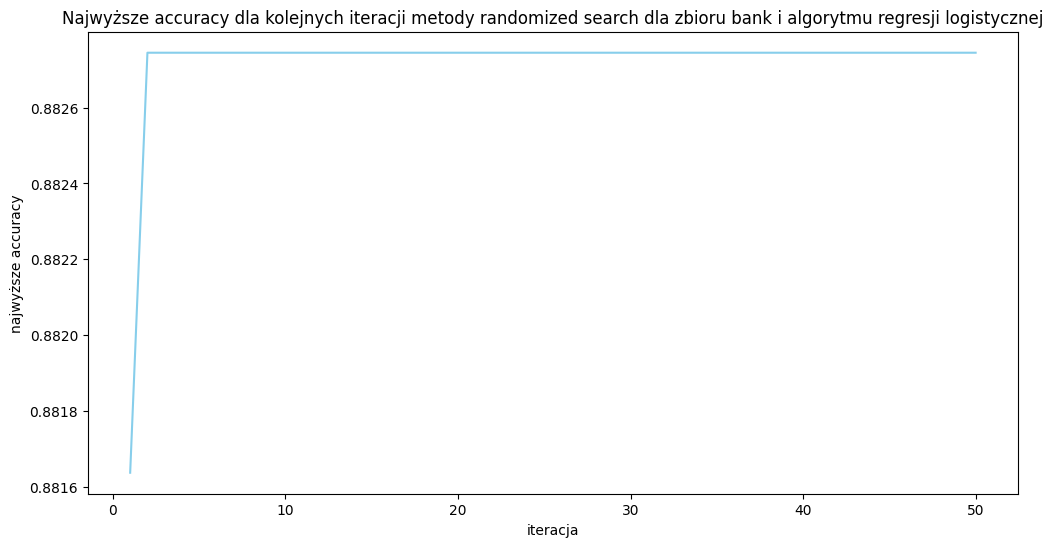

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_random_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

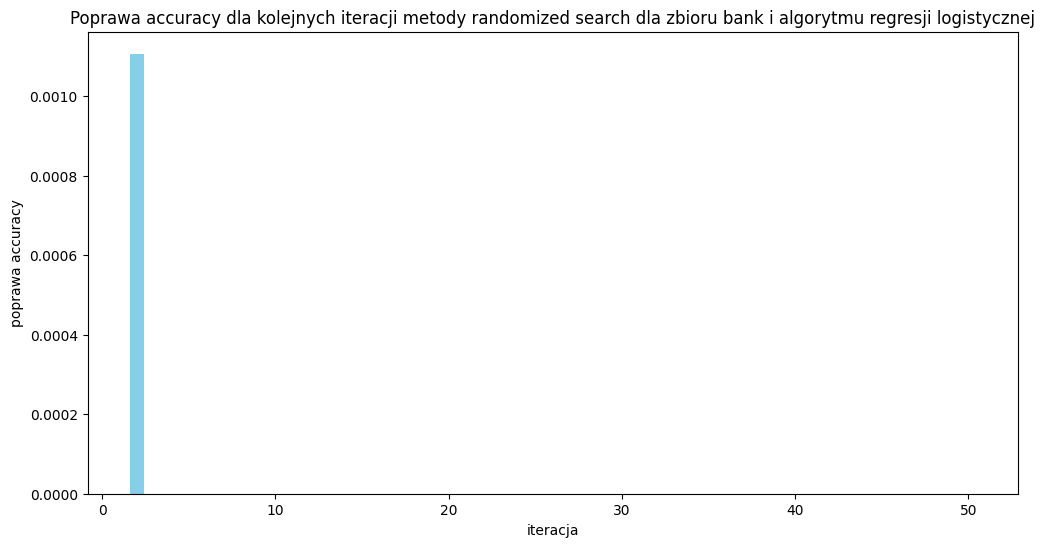

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_random_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [47]:
# Najlepsze parametry dla regresji logistycznej

log_random_best_mean = 0
log_random_best_i = -1

for i in range(50):
    mean = np.mean([log_random_cancer_scores[i], log_random_credit_scores[i], log_random_blood_scores[i], log_random_bank_scores[i]])
    if mean >= log_random_best_mean:
        log_random_best_mean = mean
        log_random_best_i = i
    
log_random_best_params = log_random_cancer_params[i]
print("Best Params for logistic regression:", log_random_best_params)

Best Params for logistic regression: {'classifier__C': 6.563234996980466e-06, 'classifier__l1_ratio': 0.34345601404832493, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}


In [48]:
# Tunowalność algorytmu regresji logistycznej

log_random_cancer_tunability = log_random_cancer_best_scores[log_random_best_i] - log_random_cancer_best_score
log_random_credit_tunability = log_random_credit_best_scores[log_random_best_i] - log_random_credit_best_score
log_random_blood_tunability = log_random_blood_best_scores[log_random_best_i] - log_random_blood_best_score
log_random_bank_tunability = log_random_bank_best_scores[log_random_best_i] - log_random_bank_best_score

tunabilities = [log_random_cancer_tunability, log_random_credit_tunability, log_random_blood_tunability, log_random_bank_tunability]
log_random_overall_tunability = np.mean(tunabilities)
print("Overall tunability for logistic regression:", log_random_overall_tunability)

Overall tunability for logistic regression: -3.5014005602407305e-06


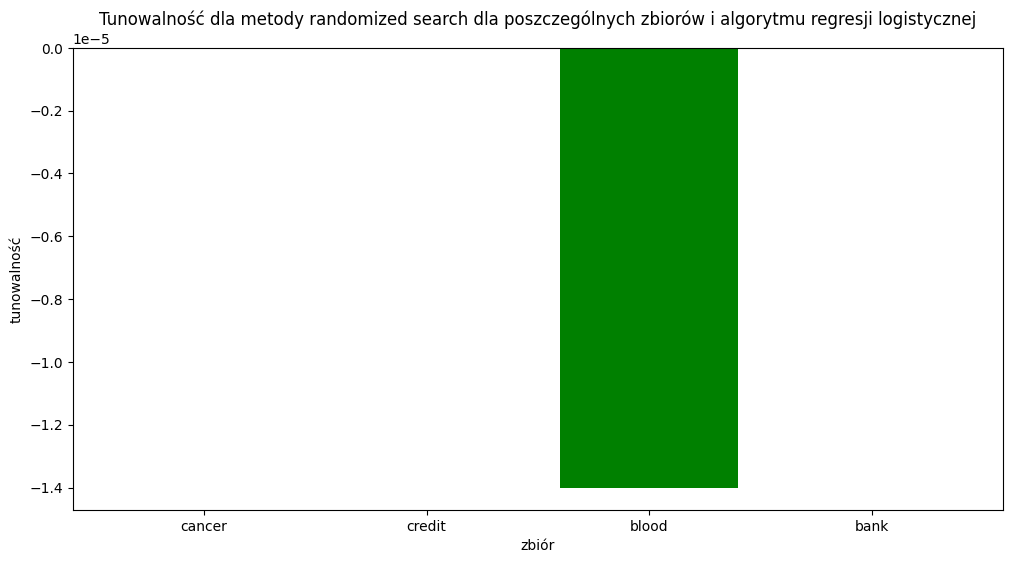

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(['cancer', 'credit', 'blood', 'bank'], tunabilities, color='green')

plt.title('Tunowalność dla metody randomized search dla poszczególnych zbiorów i algorytmu regresji logistycznej')
plt.xlabel('zbiór')
plt.ylabel('tunowalność')

plt.show()

#### KNN

In [50]:
# Zbiór cancer:
knn_cv = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=knn_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

knn_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", knn_cv.best_params_)
print("Best CV Score:", np.round(knn_cv.best_score_, 4))

knn_random_cancer_best_scores = np.maximum.accumulate(knn_cv.cv_results_['mean_test_score'])
knn_random_cancer_improvements = np.diff(knn_random_cancer_best_scores)
knn_random_cancer_scores = knn_cv.cv_results_['mean_test_score']
knn_random_cancer_params = knn_cv.cv_results_['params']
knn_random_cancer_best_score = knn_cv.best_score_

y_pred = knn_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_random_cancer = pd.DataFrame({'params': knn_random_cancer_params, 'scores': knn_random_cancer_scores})
knn_random_cancer.to_csv("knn_random_cancer.csv", index = False)

Best Params: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 4}
Best CV Score: 0.967
Test Accuracy: 0.9912


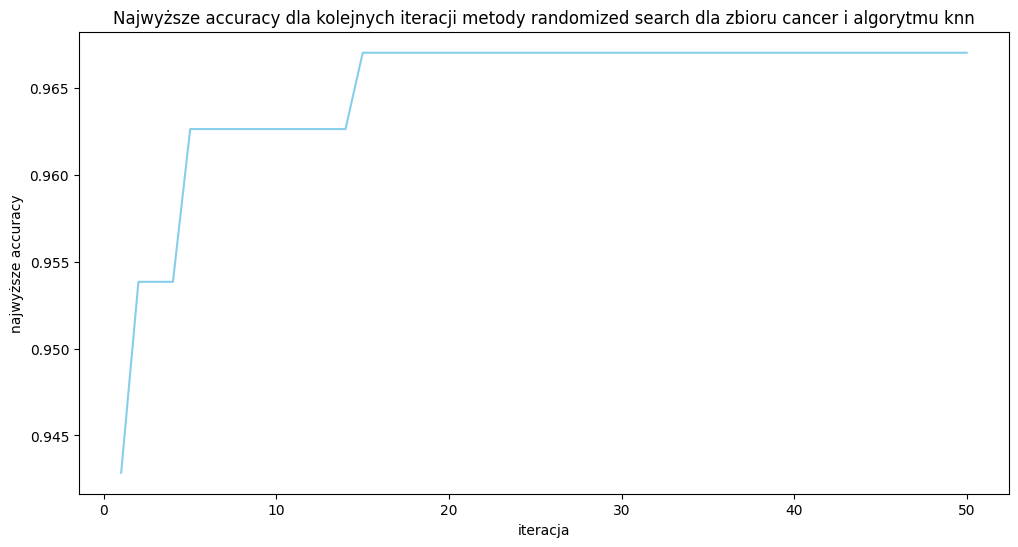

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_random_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

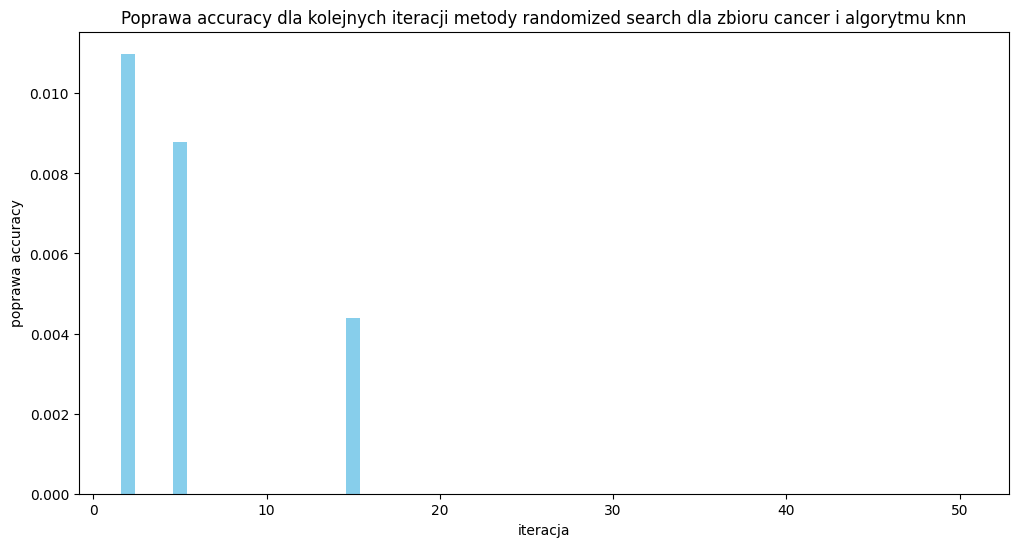

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_random_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [53]:
# Zbiór credit:
knn_cv = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=knn_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

knn_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", knn_cv.best_params_)
print("Best CV Score:", np.round(knn_cv.best_score_, 4))

knn_random_credit_best_scores = np.maximum.accumulate(knn_cv.cv_results_['mean_test_score'])
knn_random_credit_improvements = np.diff(knn_random_credit_best_scores)
knn_random_credit_scores = knn_cv.cv_results_['mean_test_score']
knn_random_credit_params = knn_cv.cv_results_['params']
knn_random_credit_best_score = knn_cv.best_score_

y_pred = knn_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_random_credit = pd.DataFrame({'params': knn_random_credit_params, 'scores': knn_random_credit_scores})
knn_random_credit.to_csv("knn_random_credit.csv", index = False)

Best Params: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 22}
Best CV Score: 0.7138
Test Accuracy: 0.705


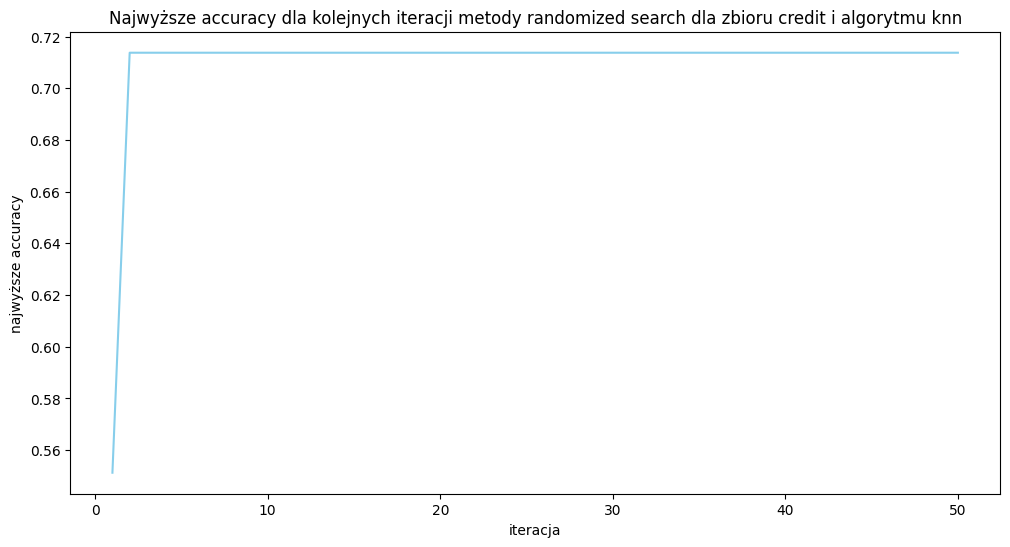

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_random_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

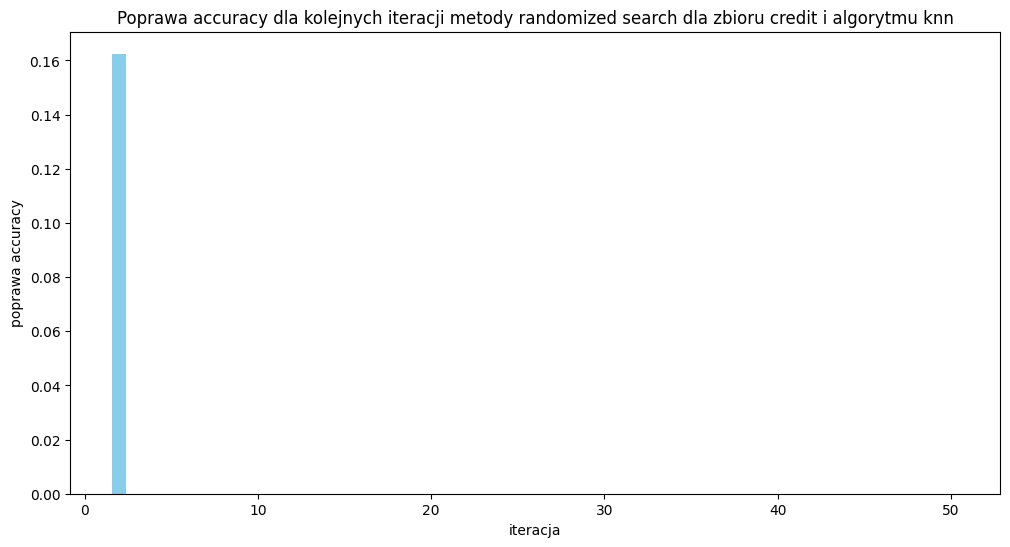

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_random_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [56]:
# Zbiór blood:
knn_cv = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=knn_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

knn_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", knn_cv.best_params_)
print("Best CV Score:", np.round(knn_cv.best_score_, 4))

knn_random_blood_best_scores = np.maximum.accumulate(knn_cv.cv_results_['mean_test_score'])
knn_random_blood_improvements = np.diff(knn_random_blood_best_scores)
knn_random_blood_scores = knn_cv.cv_results_['mean_test_score']
knn_random_blood_params = knn_cv.cv_results_['params']
knn_random_blood_best_score = knn_cv.best_score_

y_pred = knn_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_random_blood = pd.DataFrame({'params': knn_random_blood_params, 'scores': knn_random_blood_scores})
knn_random_blood.to_csv("knn_random_blood.csv", index = False)

Best Params: {'classifier__weights': 'uniform', 'classifier__p': 1, 'classifier__n_neighbors': 30}
Best CV Score: 0.8027
Test Accuracy: 0.7533


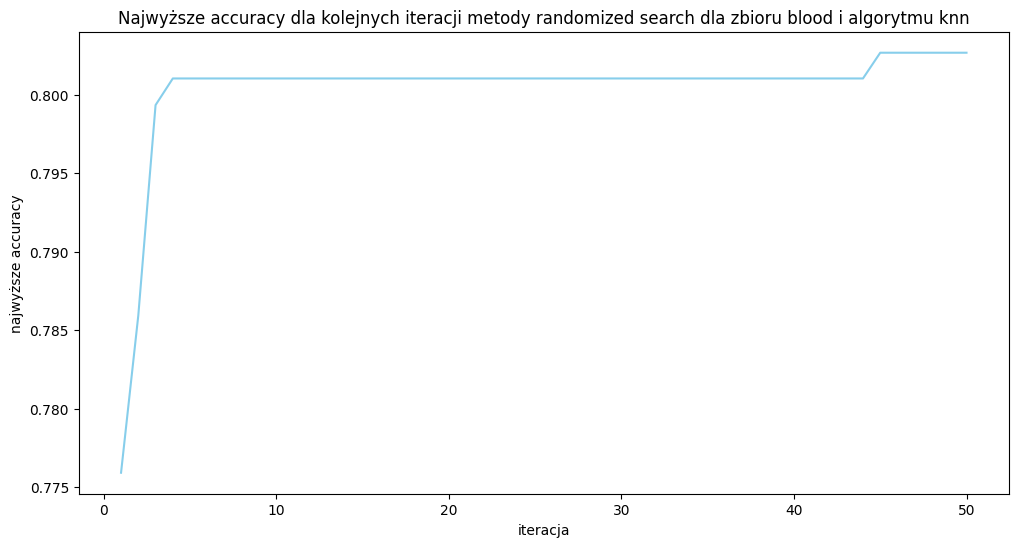

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_random_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

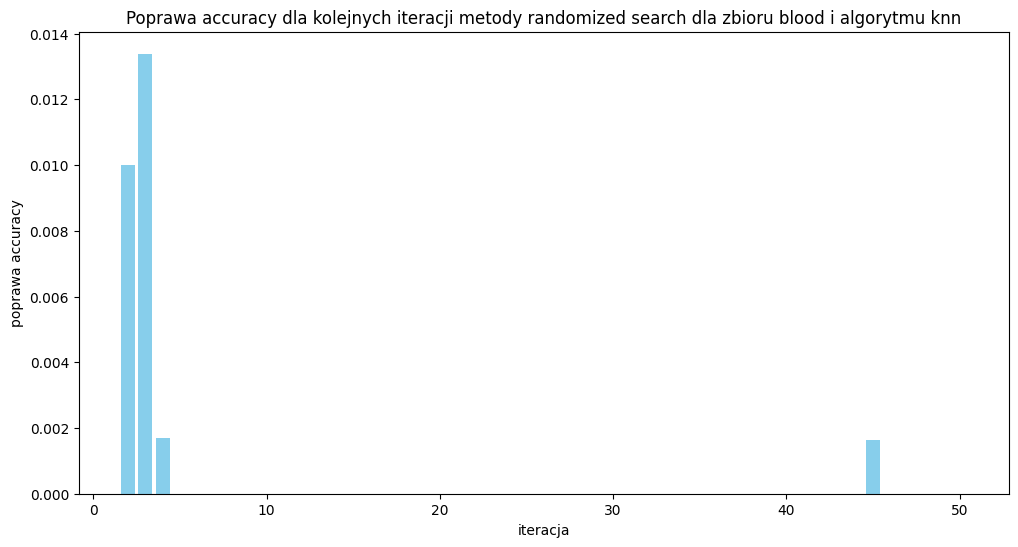

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_random_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [59]:
# Zbiór bank:
knn_cv = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=knn_params,
    n_iter=50,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

knn_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", knn_cv.best_params_)
print("Best CV Score:", np.round(knn_cv.best_score_, 4))

knn_random_bank_best_scores = np.maximum.accumulate(knn_cv.cv_results_['mean_test_score'])
knn_random_bank_improvements = np.diff(knn_random_bank_best_scores)
knn_random_bank_scores = knn_cv.cv_results_['mean_test_score']
knn_random_bank_params = knn_cv.cv_results_['params']
knn_random_bank_best_score = knn_cv.best_score_

y_pred = knn_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_random_bank = pd.DataFrame({'params': knn_random_bank_params, 'scores': knn_random_bank_scores})
knn_random_bank.to_csv("knn_random_bank.csv", index = False)

Best Params: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 14}
Best CV Score: 0.8866
Test Accuracy: 0.8961


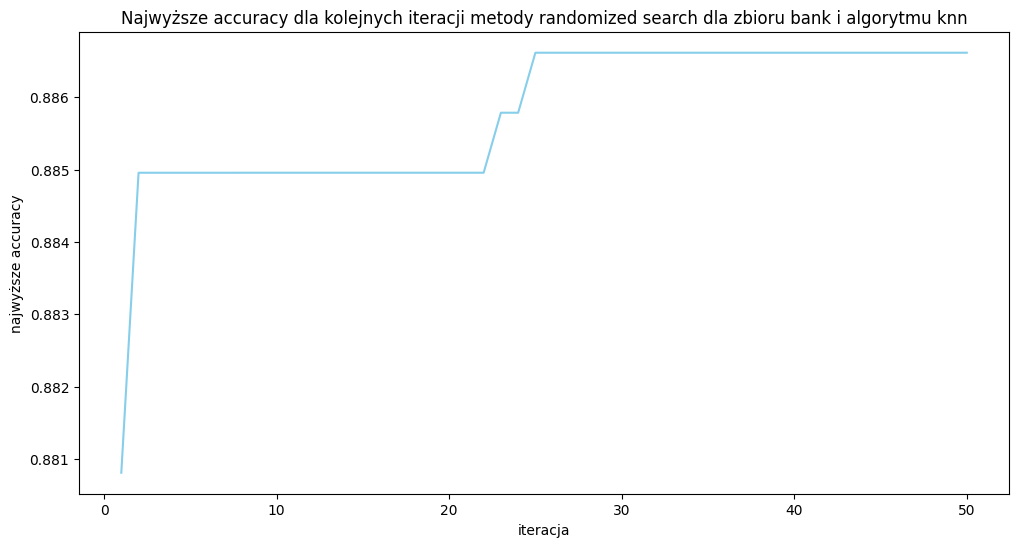

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_random_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

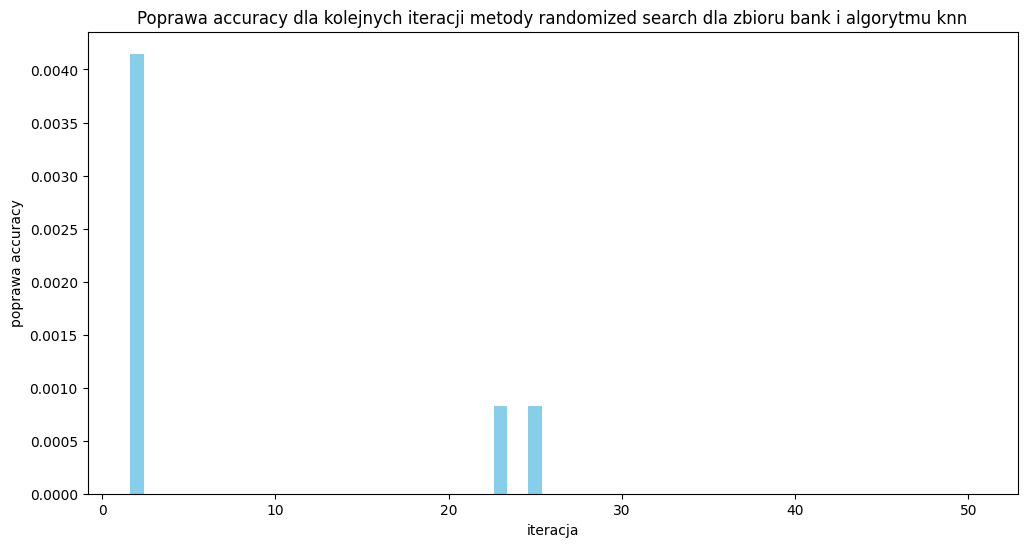

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_random_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [62]:
# Najlepsze parametry dla knn

knn_random_best_mean = 0
knn_random_best_i = -1

for i in range(50):
    mean = np.mean([knn_random_cancer_scores[i], knn_random_credit_scores[i], knn_random_blood_scores[i], knn_random_bank_scores[i]])
    if mean >= knn_random_best_mean:
        knn_random_best_mean = mean
        knn_random_best_i = i
    
knn_random_best_params = knn_random_cancer_params[i]
print("Best Params for knn:", knn_random_best_params)

Best Params for knn: {'classifier__weights': 'uniform', 'classifier__p': 2, 'classifier__n_neighbors': 18}


In [63]:
# Tunowalność algorytmu knn

knn_random_cancer_tunability = knn_random_cancer_best_scores[knn_random_best_i] - knn_random_cancer_best_score
knn_random_credit_tunability = knn_random_credit_best_scores[knn_random_best_i] - knn_random_credit_best_score
knn_random_blood_tunability = knn_random_blood_best_scores[knn_random_best_i] - knn_random_blood_best_score
knn_random_bank_tunability = knn_random_bank_best_scores[knn_random_best_i] - knn_random_bank_best_score

tunabilities = [knn_random_cancer_tunability, knn_random_credit_tunability, knn_random_blood_tunability, knn_random_bank_tunability]
knn_random_overall_tunability = np.mean(tunabilities)
print("Overall tunability for knn:", knn_random_overall_tunability)

Overall tunability for knn: -0.00040966386554619483


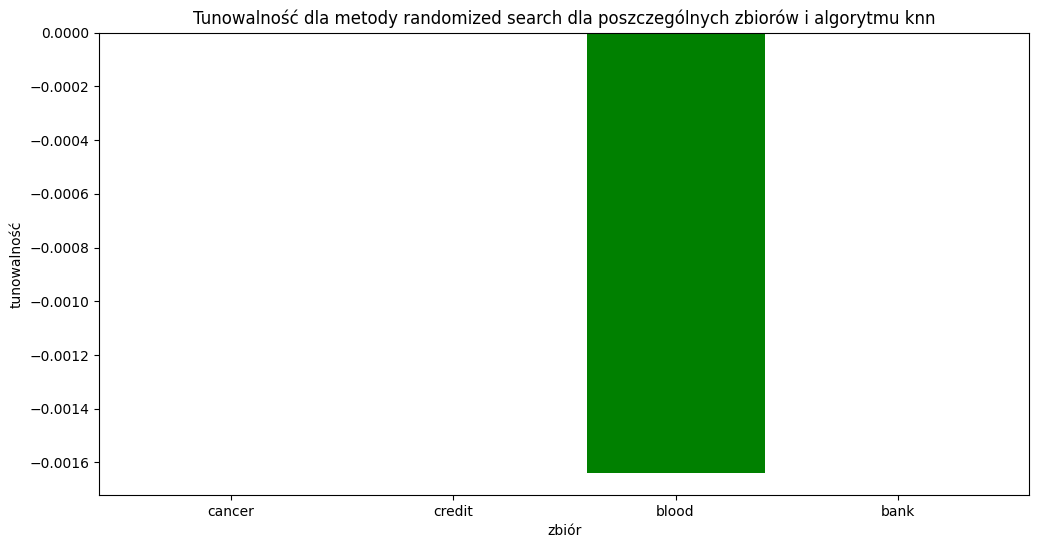

In [64]:
plt.figure(figsize=(12, 6))
plt.bar(['cancer', 'credit', 'blood', 'bank'], tunabilities, color='green')

plt.title('Tunowalność dla metody randomized search dla poszczególnych zbiorów i algorytmu knn')
plt.xlabel('zbiór')
plt.ylabel('tunowalność')

plt.show()

#### XGBoost

In [70]:
# Zbiór cancer:
xgb_cv = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=xgb_params,
    n_iter=60,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

xgb_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", xgb_cv.best_params_)
print("Best CV Score:", np.round(xgb_cv.best_score_, 4))

valid_indices = np.where(~np.isnan(xgb_cv.cv_results_['mean_test_score']))[0][:50]

xgb_random_cancer_best_scores = np.maximum.accumulate(xgb_cv.cv_results_['mean_test_score'][valid_indices])
xgb_random_cancer_improvements = np.diff(xgb_random_cancer_best_scores)
xgb_random_cancer_scores = xgb_cv.cv_results_['mean_test_score'][valid_indices]
xgb_random_cancer_params = [xgb_cv.cv_results_['params'][i] for i in valid_indices]
xgb_random_cancer_best_score = xgb_cv.best_score_

y_pred = xgb_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_random_cancer = pd.DataFrame({'params': xgb_random_cancer_params, 'scores': xgb_random_cancer_scores})
xgb_random_cancer.to_csv("xgb_random_cancer.csv", index = False)

Best Params: {'classifier__alpha': 2.2681546701868536, 'classifier__booster': 'dart', 'classifier__colsample_bylevel': 0.0849041631918176, 'classifier__colsample_bytree': 0.5826710878614046, 'classifier__eta': 0.01407463136706921, 'classifier__lambda': 0.002288045645198511, 'classifier__max_depth': 9, 'classifier__min_child_weight': 2.4908065525640732, 'classifier__n_estimators': 216, 'classifier__subsample': 0.43861750179263936}
Best CV Score: 0.9363
Test Accuracy: 0.9561


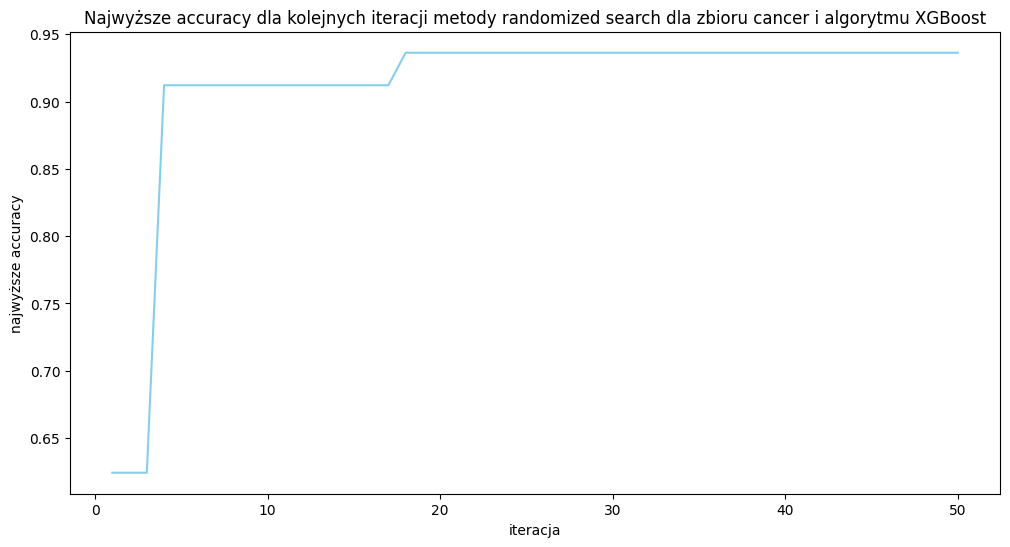

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_random_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

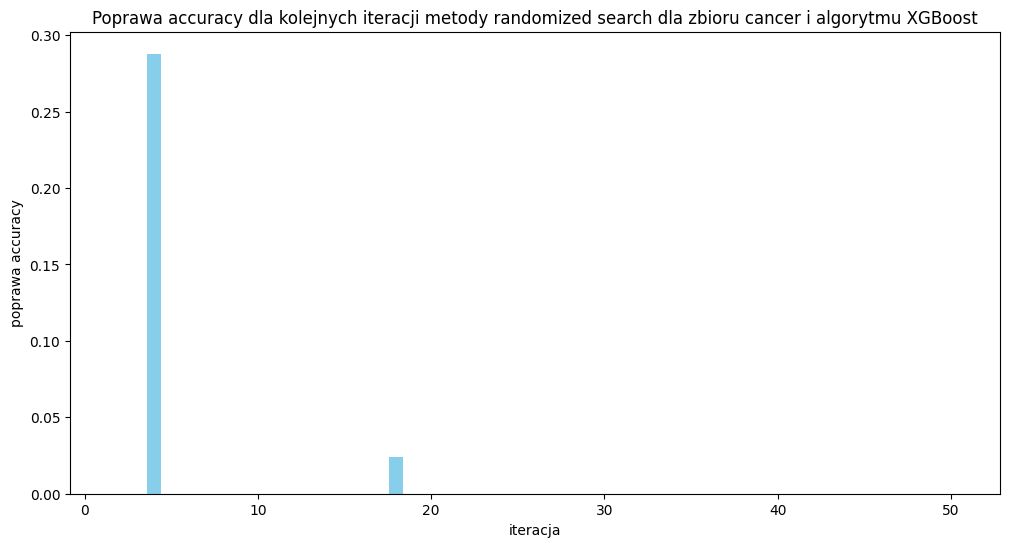

In [72]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_random_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [75]:
# Zbiór credit:
xgb_cv = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=xgb_params,
    n_iter=60,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

xgb_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", xgb_cv.best_params_)
print("Best CV Score:", np.round(xgb_cv.best_score_, 4))

valid_indices = np.where(~np.isnan(xgb_cv.cv_results_['mean_test_score']))[0][:50]

xgb_random_credit_best_scores = np.maximum.accumulate(xgb_cv.cv_results_['mean_test_score'][valid_indices])
xgb_random_credit_improvements = np.diff(xgb_random_credit_best_scores)
xgb_random_credit_scores = xgb_cv.cv_results_['mean_test_score'][valid_indices]
xgb_random_credit_params = [xgb_cv.cv_results_['params'][i] for i in valid_indices]
xgb_random_credit_best_score = xgb_cv.best_score_

y_pred = xgb_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_random_credit = pd.DataFrame({'params': xgb_random_credit_params, 'scores': xgb_random_credit_scores})
xgb_random_credit.to_csv("xgb_random_credit.csv", index = False)

Best Params: {'classifier__alpha': 0.00039613445319493343, 'classifier__booster': 'gblinear', 'classifier__colsample_bylevel': 0.9879952865166672, 'classifier__colsample_bytree': 0.7659959501929948, 'classifier__eta': 0.005889038436788433, 'classifier__lambda': 1.56990613018721e-05, 'classifier__max_depth': 7, 'classifier__min_child_weight': 956.7798757101157, 'classifier__n_estimators': 485, 'classifier__subsample': 0.989865699606771}
Best CV Score: 0.7025
Test Accuracy: 0.685


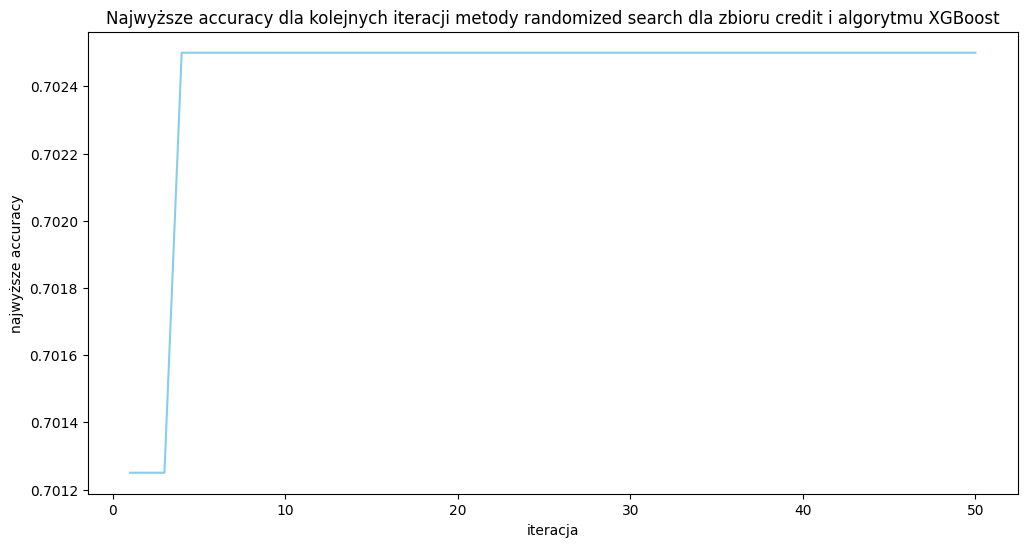

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_random_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

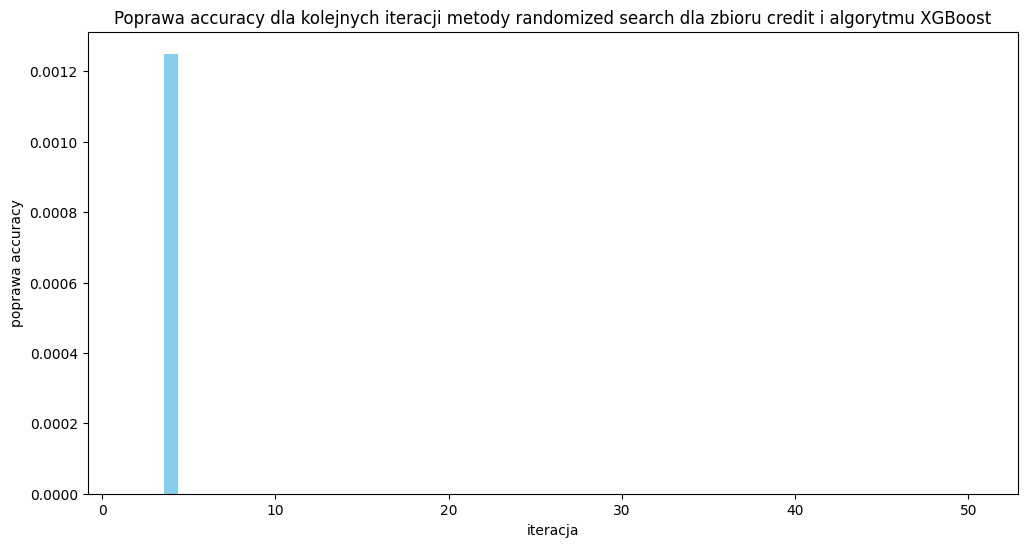

In [77]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_random_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [80]:
# Zbiór blood:
xgb_cv = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=xgb_params,
    n_iter=60,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

xgb_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", xgb_cv.best_params_)
print("Best CV Score:", np.round(xgb_cv.best_score_, 4))

valid_indices = np.where(~np.isnan(xgb_cv.cv_results_['mean_test_score']))[0][:50]

xgb_random_blood_best_scores = np.maximum.accumulate(xgb_cv.cv_results_['mean_test_score'][valid_indices])
xgb_random_blood_improvements = np.diff(xgb_random_blood_best_scores)
xgb_random_blood_scores = xgb_cv.cv_results_['mean_test_score'][valid_indices]
xgb_random_blood_params = [xgb_cv.cv_results_['params'][i] for i in valid_indices]
xgb_random_blood_best_score = xgb_cv.best_score_

y_pred = xgb_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_random_blood = pd.DataFrame({'params': xgb_random_blood_params, 'scores': xgb_random_blood_scores})
xgb_random_blood.to_csv("xgb_random_blood.csv", index = False)

Best Params: {'classifier__alpha': 0.00039613445319493343, 'classifier__booster': 'gblinear', 'classifier__colsample_bylevel': 0.9879952865166672, 'classifier__colsample_bytree': 0.7659959501929948, 'classifier__eta': 0.005889038436788433, 'classifier__lambda': 1.56990613018721e-05, 'classifier__max_depth': 7, 'classifier__min_child_weight': 956.7798757101157, 'classifier__n_estimators': 485, 'classifier__subsample': 0.989865699606771}
Best CV Score: 0.7792
Test Accuracy: 0.74


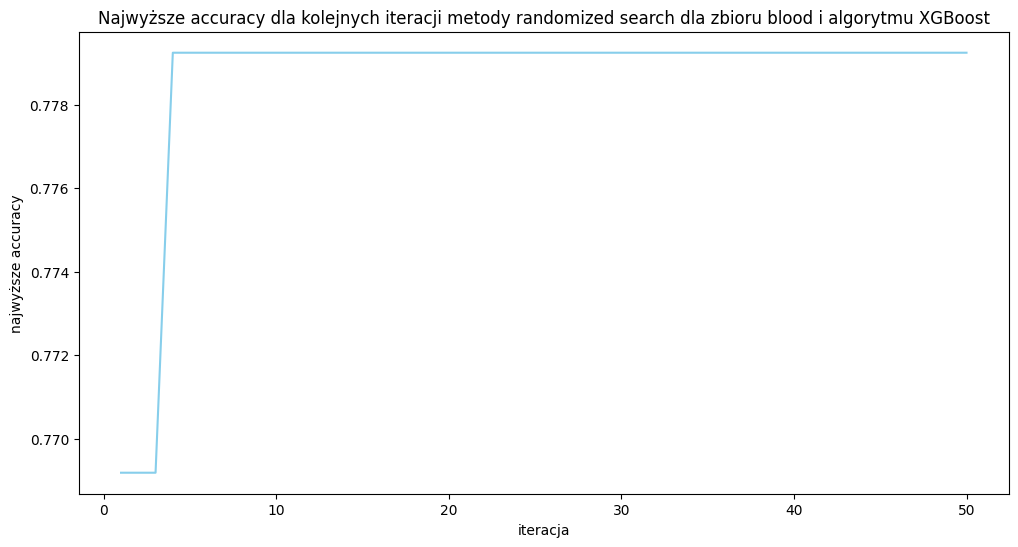

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_random_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

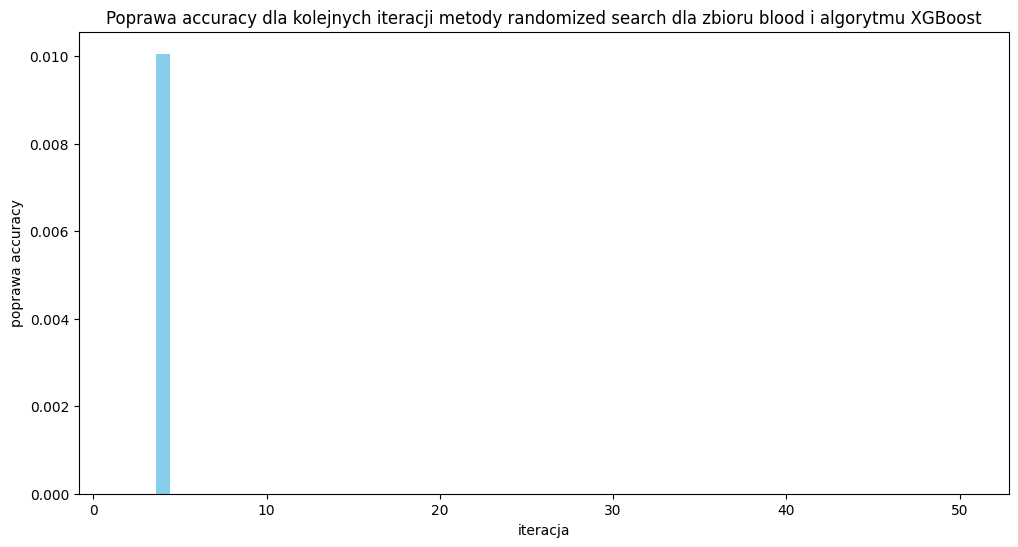

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_random_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [83]:
# Zbiór bank:
xgb_cv = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=xgb_params,
    n_iter=60,
    cv=kf,
    scoring=SCORING,
    random_state=123
)

xgb_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", xgb_cv.best_params_)
print("Best CV Score:", np.round(xgb_cv.best_score_, 4))

valid_indices = np.where(~np.isnan(xgb_cv.cv_results_['mean_test_score']))[0][:50]

xgb_random_bank_best_scores = np.maximum.accumulate(xgb_cv.cv_results_['mean_test_score'][valid_indices])
xgb_random_bank_improvements = np.diff(xgb_random_bank_best_scores)
xgb_random_bank_scores = xgb_cv.cv_results_['mean_test_score'][valid_indices]
xgb_random_bank_params = [xgb_cv.cv_results_['params'][i] for i in valid_indices]
xgb_random_bank_best_score = xgb_cv.best_score_

y_pred = xgb_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_random_bank = pd.DataFrame({'params': xgb_random_bank_params, 'scores': xgb_random_bank_scores})
xgb_random_bank.to_csv("xgb_random_bank.csv", index = False)

Best Params: {'classifier__alpha': 0.7503852680901562, 'classifier__booster': 'dart', 'classifier__colsample_bylevel': 0.4284709261868257, 'classifier__colsample_bytree': 0.6908848550268617, 'classifier__eta': 0.0015541863900746153, 'classifier__lambda': 0.027405172119754927, 'classifier__max_depth': 10, 'classifier__min_child_weight': 7334143.256313194, 'classifier__n_estimators': 97, 'classifier__subsample': 0.6796942970226101}
Best CV Score: 0.8827
Test Accuracy: 0.8928


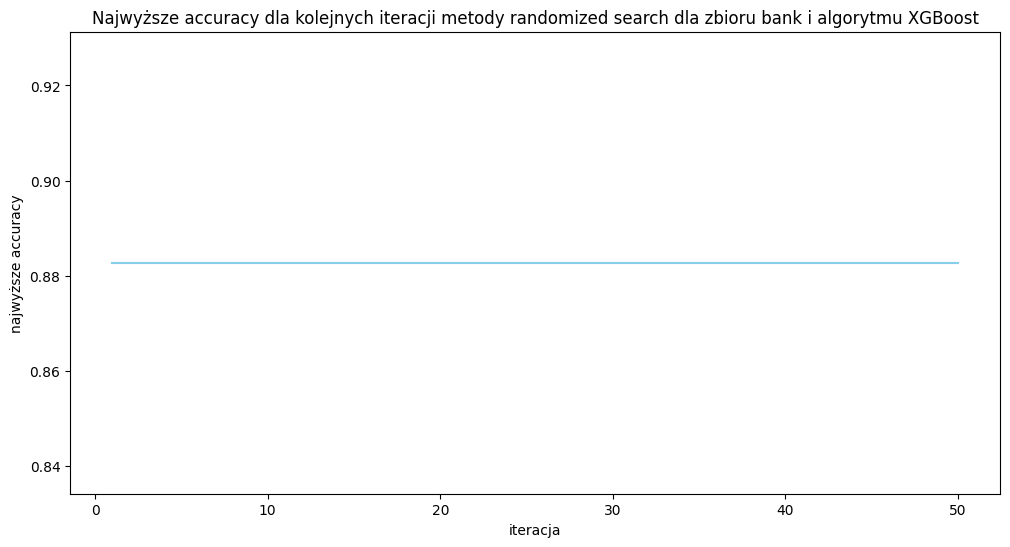

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(xgb_random_bank_best_scores) + 1), xgb_random_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

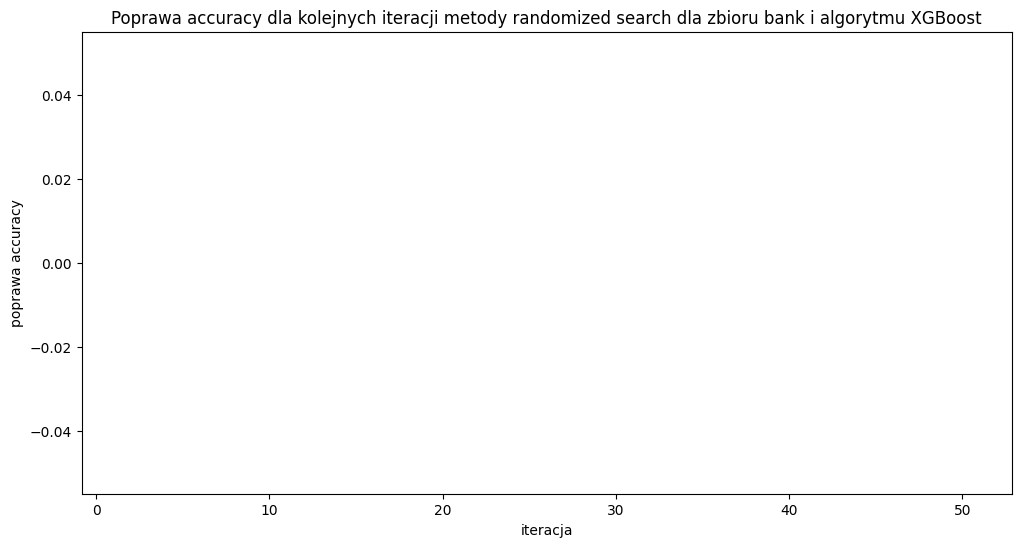

In [85]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, len(xgb_random_bank_best_scores) + 1), xgb_random_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody randomized search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [86]:
# Najlepsze parametry dla XGBoost

xgb_random_best_mean = 0
xgb_random_best_i = -1

for i in range(len(xgb_random_cancer_best_scores)):
    mean = np.mean([xgb_random_cancer_scores[i], xgb_random_credit_scores[i], xgb_random_blood_scores[i], xgb_random_bank_scores[i]])
    if mean >= xgb_random_best_mean:
        xgb_random_best_mean = mean
        xgb_random_best_i = i
    
xgb_random_best_params = xgb_random_cancer_params[i]
print("Best Params for XGBoost:", xgb_random_best_params)

Best Params for XGBoost: {'classifier__alpha': 0.006066641915981054, 'classifier__booster': 'gbtree', 'classifier__colsample_bylevel': 0.141194832453028, 'classifier__colsample_bytree': 0.5588264346475861, 'classifier__eta': 2.4708290259874402e-08, 'classifier__lambda': 2.051302466178794, 'classifier__max_depth': 8, 'classifier__min_child_weight': 5.4627652310036785, 'classifier__n_estimators': 237, 'classifier__subsample': 0.2477228436396202}


In [87]:
# Tunowalność algorytmu XGBoost

xgb_random_cancer_tunability = xgb_random_cancer_best_scores[xgb_random_best_i] - xgb_random_cancer_best_score
xgb_random_credit_tunability = xgb_random_credit_best_scores[xgb_random_best_i] - xgb_random_credit_best_score
xgb_random_blood_tunability = xgb_random_blood_best_scores[xgb_random_best_i] - xgb_random_blood_best_score
xgb_random_bank_tunability = xgb_random_bank_best_scores[xgb_random_best_i] - xgb_random_bank_best_score

tunabilities = [xgb_random_cancer_tunability, xgb_random_credit_tunability, xgb_random_blood_tunability, xgb_random_bank_tunability]
xgb_random_overall_tunability = np.mean(tunabilities)
print("Overall tunability for XGBoost:", xgb_random_overall_tunability)

Overall tunability for XGBoost: 0.0


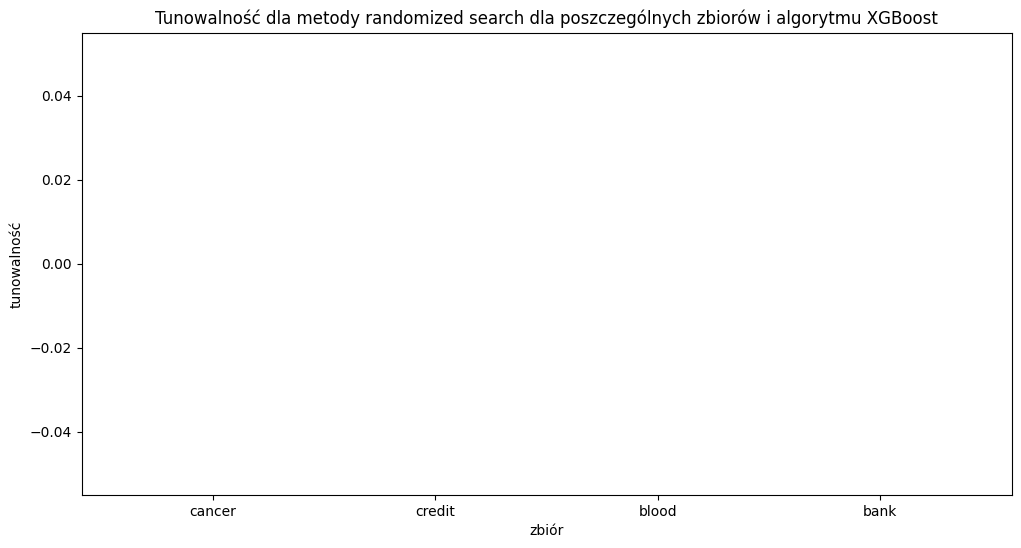

In [88]:
plt.figure(figsize=(12, 6))
plt.bar(['cancer', 'credit', 'blood', 'bank'], tunabilities, color='green')

plt.title('Tunowalność dla metody randomized search dla poszczególnych zbiorów i algorytmu XGBoost')
plt.xlabel('zbiór')
plt.ylabel('tunowalność')

plt.show()

### BayesSearch:

#### Regresja logistyczna

In [82]:
# Zbiór cancer:

log_bayes_cancer_scores = []
log_bayes_cancer_params = []
log_bayes_cancer_test_accuracies = []

for state in range(123, 173):
    bayes_log_cv = BayesSearchCV(
        pipeline_log,
        search_spaces=bayes_log_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_log_cv.fit(X_train_cancer, y_train_cancer)
    
    log_bayes_cancer_scores.append(bayes_log_cv.best_score_)
    log_bayes_cancer_params.append(bayes_log_cv.best_params_)  
    
    y_pred = bayes_log_cv.best_estimator_.predict(X_test_cancer)
    test_accuracy = accuracy_score(y_test_cancer, y_pred)
    log_bayes_cancer_test_accuracies.append(test_accuracy)
    
log_bayes_cancer_best_scores = np.maximum.accumulate(log_bayes_cancer_scores)
log_bayes_cancer_improvements = np.diff(log_bayes_cancer_best_scores)
log_bayes_cancer_best_score = np.max(log_bayes_cancer_scores)

print("Best Params:", log_bayes_cancer_params[np.argmax(log_bayes_cancer_scores)])
print("Best CV Score:", np.round(log_bayes_cancer_best_score, 4))
print("Test Accuracy:", np.round(log_bayes_cancer_test_accuracies[np.argmax(log_bayes_cancer_scores)], 4))

log_bayes_cancer = pd.DataFrame({'params': log_bayes_cancer_params, 'scores': log_bayes_cancer_scores})
log_bayes_cancer.to_csv("log_bayes_cancer.csv", index = False)

Best Params: OrderedDict([('classifier__C', 1.9430084774603675), ('classifier__l1_ratio', 0.8678220108468978), ('classifier__penalty', 'elasticnet'), ('classifier__solver', 'saga')])
Best CV Score: 0.9736
Test Accuracy: 0.9825


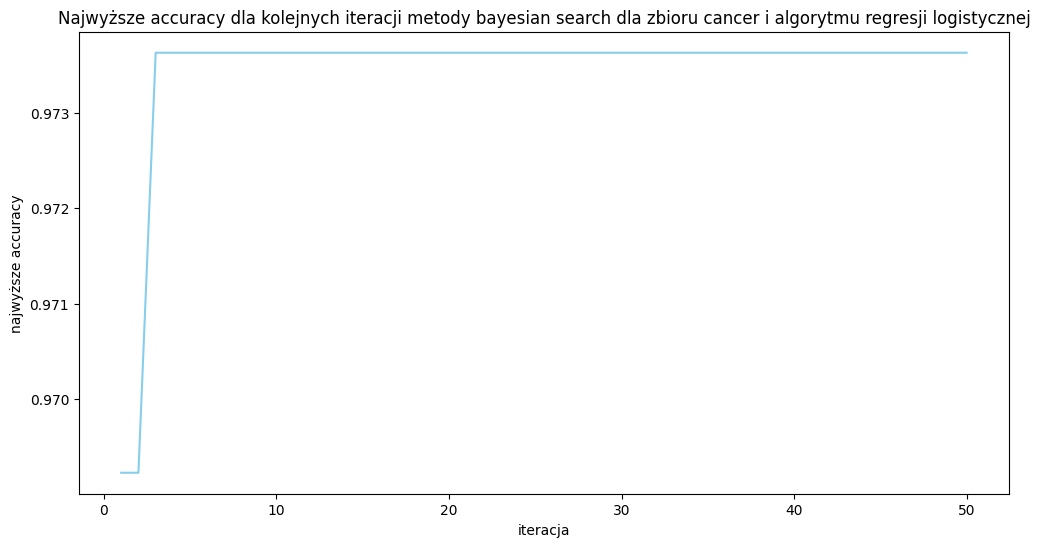

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_bayes_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

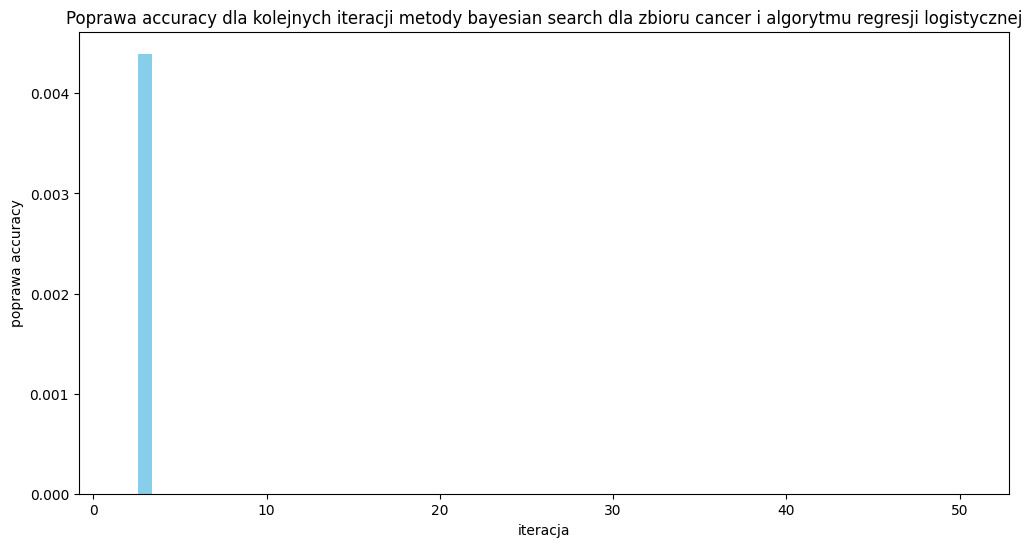

In [84]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_bayes_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [85]:
# Zbiór credit:

log_bayes_credit_scores = []
log_bayes_credit_params = []
log_bayes_credit_test_accuracies = []

for state in range(123, 173):
    bayes_log_cv = BayesSearchCV(
        pipeline_log,
        search_spaces=bayes_log_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_log_cv.fit(X_train_credit, y_train_credit)
    
    log_bayes_credit_scores.append(bayes_log_cv.best_score_)
    log_bayes_credit_params.append(bayes_log_cv.best_params_)  
    
    y_pred = bayes_log_cv.best_estimator_.predict(X_test_credit)
    test_accuracy = accuracy_score(y_test_credit, y_pred)
    log_bayes_credit_test_accuracies.append(test_accuracy)
    
log_bayes_credit_best_scores = np.maximum.accumulate(log_bayes_credit_scores)
log_bayes_credit_improvements = np.diff(log_bayes_credit_best_scores)
log_bayes_credit_best_score = np.max(log_bayes_credit_scores)

print("Best Params:", log_bayes_credit_params[np.argmax(log_bayes_credit_scores)])
print("Best CV Score:", np.round(log_bayes_credit_best_score, 4))
print("Test Accuracy:", np.round(log_bayes_credit_test_accuracies[np.argmax(log_bayes_credit_scores)], 4))

log_bayes_credit = pd.DataFrame({'params': log_bayes_credit_params, 'scores': log_bayes_credit_scores})
log_bayes_credit.to_csv("log_bayes_credit.csv", index = False)

Best Params: OrderedDict([('classifier__C', 0.6855884591161421), ('classifier__l1_ratio', 1.0), ('classifier__penalty', 'elasticnet'), ('classifier__solver', 'saga')])
Best CV Score: 0.7213
Test Accuracy: 0.685


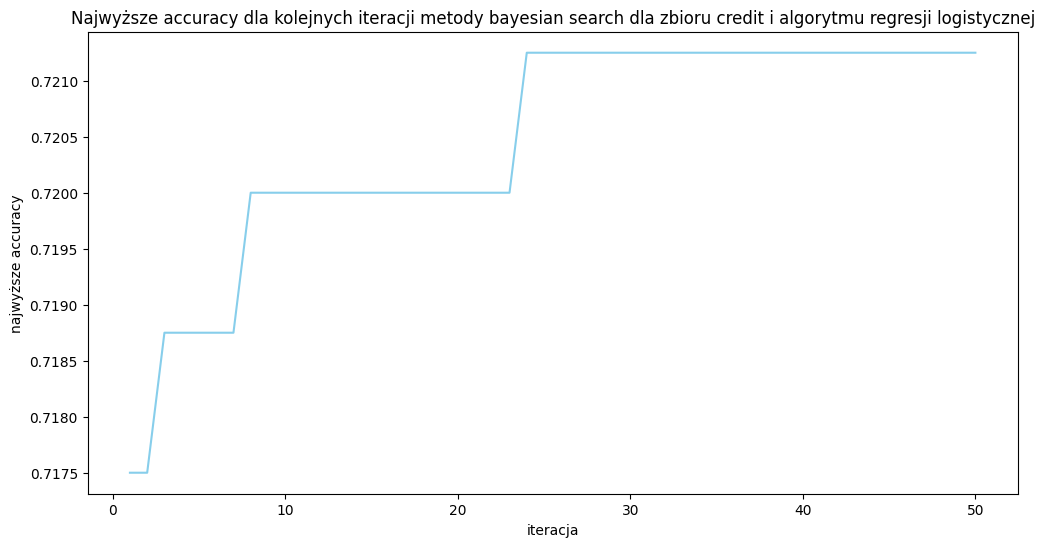

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_bayes_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

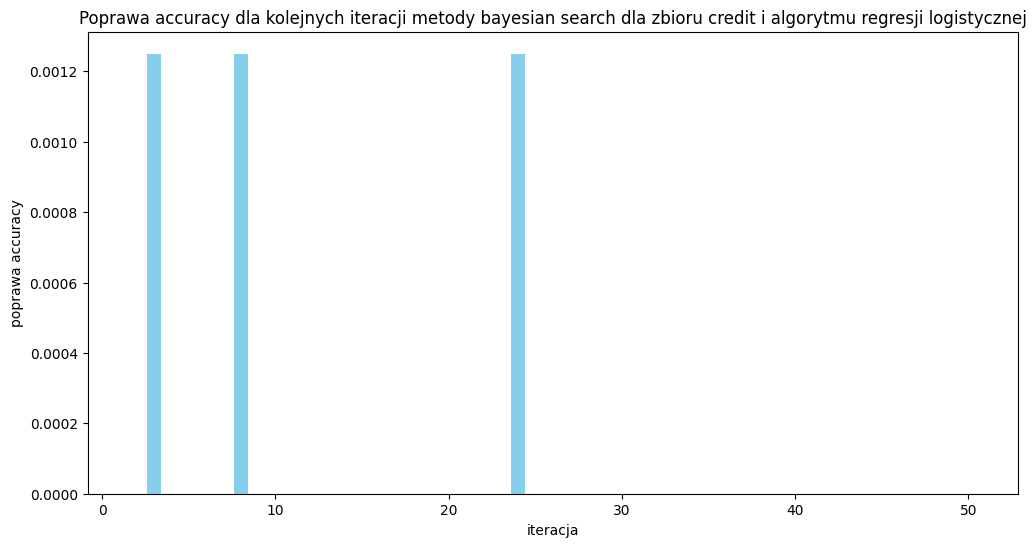

In [87]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_bayes_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [88]:
# Zbiór blood:

log_bayes_blood_scores = []
log_bayes_blood_params = []
log_bayes_blood_test_accuracies = []

for state in range(123, 173):
    bayes_log_cv = BayesSearchCV(
        pipeline_log,
        search_spaces=bayes_log_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_log_cv.fit(X_train_blood, y_train_blood)
    
    log_bayes_blood_scores.append(bayes_log_cv.best_score_)
    log_bayes_blood_params.append(bayes_log_cv.best_params_)  
    
    y_pred = bayes_log_cv.best_estimator_.predict(X_test_blood)
    test_accuracy = accuracy_score(y_test_blood, y_pred)
    log_bayes_blood_test_accuracies.append(test_accuracy)
    
log_bayes_blood_best_scores = np.maximum.accumulate(log_bayes_blood_scores)
log_bayes_blood_improvements = np.diff(log_bayes_blood_best_scores)
log_bayes_blood_best_score = np.max(log_bayes_blood_scores)

print("Best Params:", log_bayes_blood_params[np.argmax(log_bayes_blood_scores)])
print("Best CV Score:", np.round(log_bayes_blood_best_score, 4))
print("Test Accuracy:", np.round(log_bayes_blood_test_accuracies[np.argmax(log_bayes_blood_scores)], 4))

log_bayes_blood = pd.DataFrame({'params': log_bayes_blood_params, 'scores': log_bayes_blood_scores})
log_bayes_blood.to_csv("log_bayes_blood.csv", index = False)

Best Params: OrderedDict([('classifier__C', 6.079768770772857), ('classifier__l1_ratio', 1.0), ('classifier__penalty', 'elasticnet'), ('classifier__solver', 'saga')])
Best CV Score: 0.786
Test Accuracy: 0.72


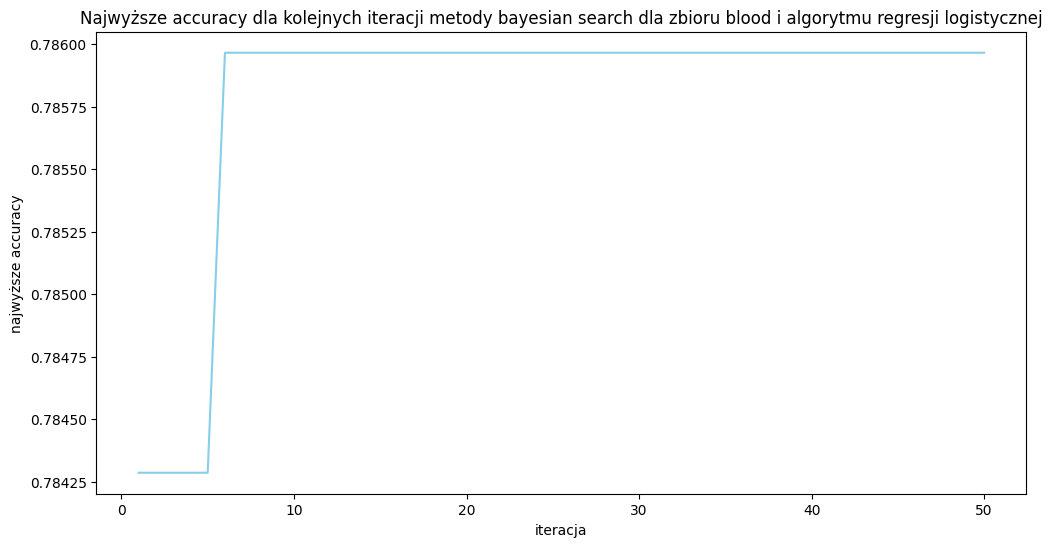

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_bayes_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

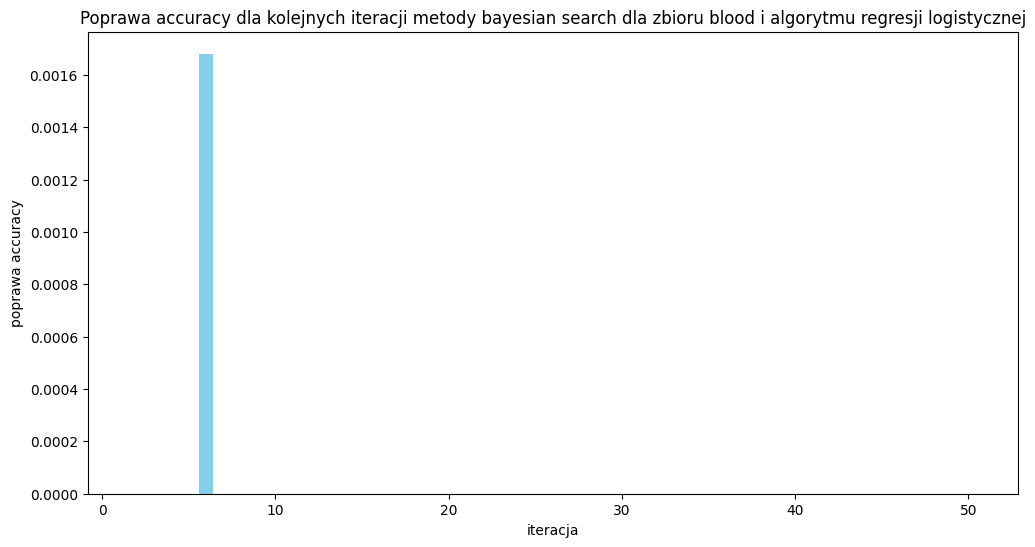

In [90]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_bayes_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [91]:
# Zbiór bank:

log_bayes_bank_scores = []
log_bayes_bank_params = []
log_bayes_bank_test_accuracies = []

for state in range(123, 173):
    bayes_log_cv = BayesSearchCV(
        pipeline_log,
        search_spaces=bayes_log_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_log_cv.fit(X_train_bank, y_train_bank)
    
    log_bayes_bank_scores.append(bayes_log_cv.best_score_)
    log_bayes_bank_params.append(bayes_log_cv.best_params_)  
    
    y_pred = bayes_log_cv.best_estimator_.predict(X_test_bank)
    test_accuracy = accuracy_score(y_test_bank, y_pred)
    log_bayes_bank_test_accuracies.append(test_accuracy)
    
log_bayes_bank_best_scores = np.maximum.accumulate(log_bayes_bank_scores)
log_bayes_bank_improvements = np.diff(log_bayes_bank_best_scores)
log_bayes_bank_best_score = np.max(log_bayes_bank_scores)

print("Best Params:", log_bayes_bank_params[np.argmax(log_bayes_bank_scores)])
print("Best CV Score:", np.round(log_bayes_bank_best_score, 4))
print("Test Accuracy:", np.round(log_bayes_bank_test_accuracies[np.argmax(log_bayes_bank_scores)], 4))

log_bayes_bank = pd.DataFrame({'params': log_bayes_bank_params, 'scores': log_bayes_bank_scores})
log_bayes_bank.to_csv("log_bayes_bank.csv", index = False)

Best Params: OrderedDict([('classifier__C', 0.049346434925472006), ('classifier__l1_ratio', 1.0), ('classifier__penalty', 'elasticnet'), ('classifier__solver', 'saga')])
Best CV Score: 0.8836
Test Accuracy: 0.8961


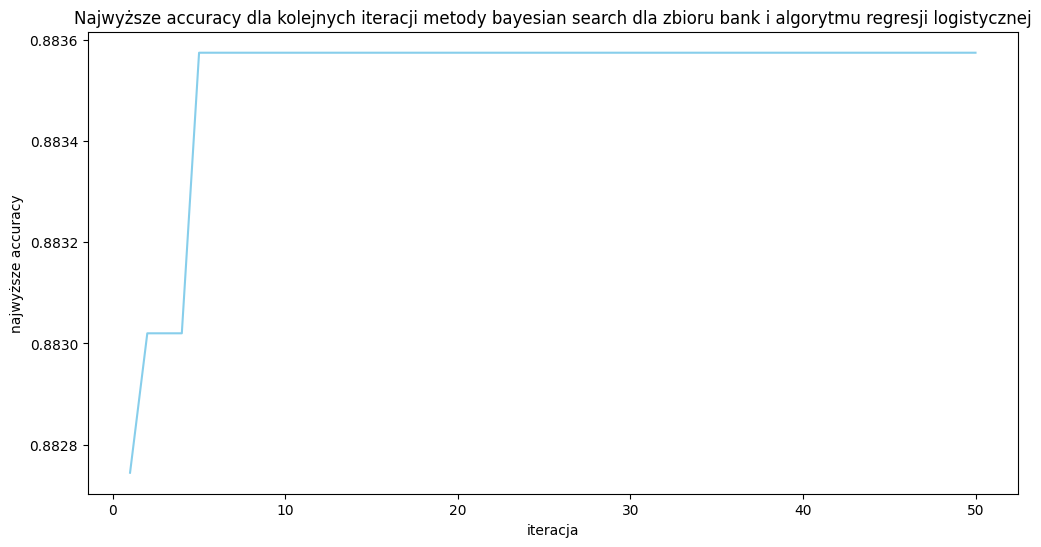

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_bayes_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

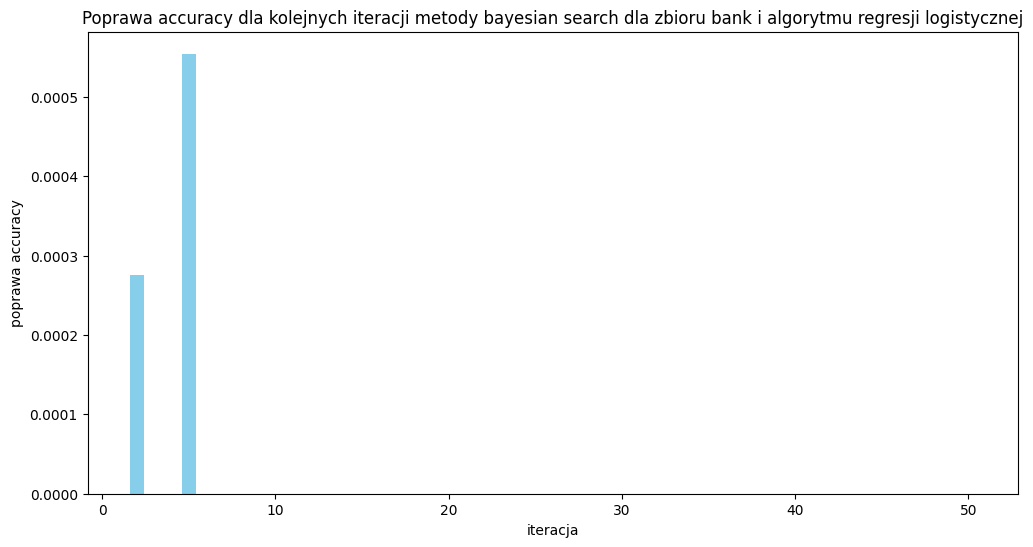

In [93]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_bayes_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

#### KNN:

In [94]:
# Zbiór cancer:

knn_bayes_cancer_scores = []
knn_bayes_cancer_params = []
knn_bayes_cancer_test_accuracies = []

for state in range(123, 173):
    bayes_knn_cv = BayesSearchCV(
        pipeline_knn,
        search_spaces=bayes_knn_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_knn_cv.fit(X_train_cancer, y_train_cancer)
    
    knn_bayes_cancer_scores.append(bayes_knn_cv.best_score_)
    knn_bayes_cancer_params.append(bayes_knn_cv.best_params_)  
    
    y_pred = bayes_knn_cv.best_estimator_.predict(X_test_cancer)
    test_accuracy = accuracy_score(y_test_cancer, y_pred)
    knn_bayes_cancer_test_accuracies.append(test_accuracy)
    
knn_bayes_cancer_best_scores = np.maximum.accumulate(knn_bayes_cancer_scores)
knn_bayes_cancer_improvements = np.diff(knn_bayes_cancer_best_scores)
knn_bayes_cancer_best_score = np.max(knn_bayes_cancer_scores)

print("Best Params:", knn_bayes_cancer_params[np.argmax(knn_bayes_cancer_scores)])
print("Best CV Score:", np.round(knn_bayes_cancer_best_score, 4))
print("Test Accuracy:", np.round(knn_bayes_cancer_test_accuracies[np.argmax(knn_bayes_cancer_scores)], 4))

knn_bayes_cancer = pd.DataFrame({'params': knn_bayes_cancer_params, 'scores': knn_bayes_cancer_scores})
knn_bayes_cancer.to_csv("knn_bayes_cancer.csv", index = False)

Best Params: OrderedDict([('classifier__n_neighbors', 7), ('classifier__p', 2), ('classifier__weights', 'distance')])
Best CV Score: 0.967
Test Accuracy: 0.9737


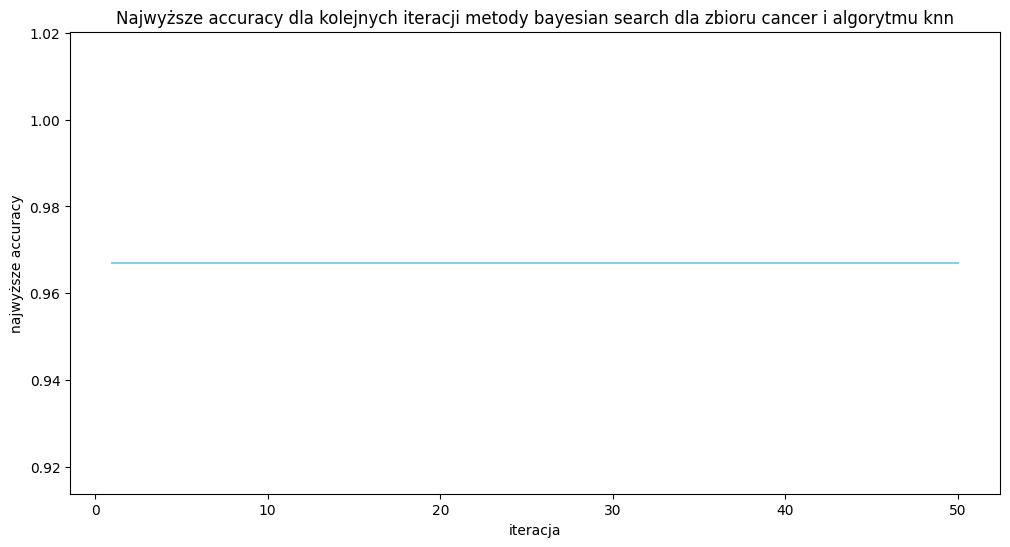

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_bayes_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

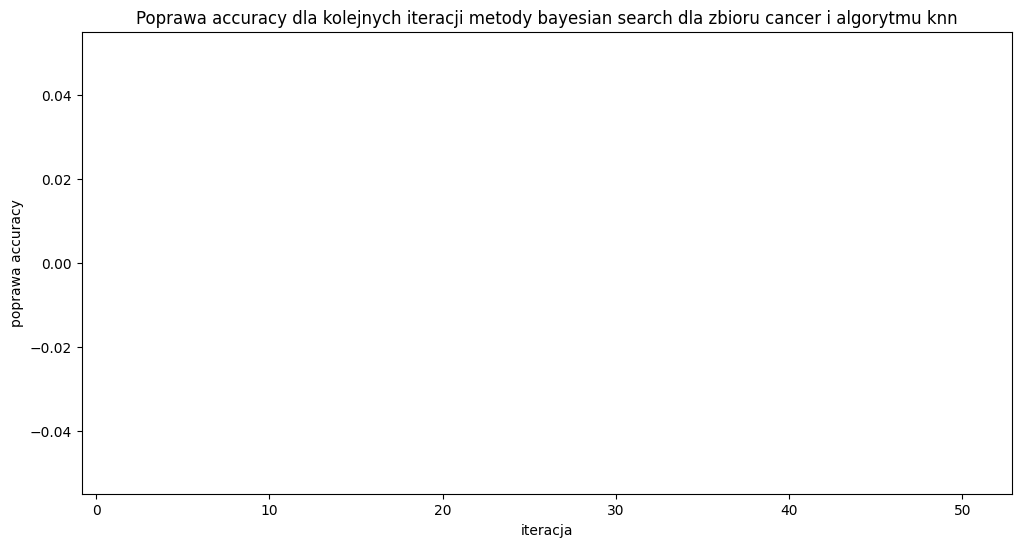

In [96]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_bayes_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [97]:
# Zbiór credit:

knn_bayes_credit_scores = []
knn_bayes_credit_params = []
knn_bayes_credit_test_accuracies = []

for state in range(123, 173):
    bayes_knn_cv = BayesSearchCV(
        pipeline_knn,
        search_spaces=bayes_knn_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_knn_cv.fit(X_train_credit, y_train_credit)
    
    knn_bayes_credit_scores.append(bayes_knn_cv.best_score_)
    knn_bayes_credit_params.append(bayes_knn_cv.best_params_)  
    
    y_pred = bayes_knn_cv.best_estimator_.predict(X_test_credit)
    test_accuracy = accuracy_score(y_test_credit, y_pred)
    knn_bayes_credit_test_accuracies.append(test_accuracy)
    
knn_bayes_credit_best_scores = np.maximum.accumulate(knn_bayes_credit_scores)
knn_bayes_credit_improvements = np.diff(knn_bayes_credit_best_scores)
knn_bayes_credit_best_score = np.max(knn_bayes_credit_scores)

print("Best Params:", knn_bayes_credit_params[np.argmax(knn_bayes_credit_scores)])
print("Best CV Score:", np.round(knn_bayes_credit_best_score, 4))
print("Test Accuracy:", np.round(knn_bayes_credit_test_accuracies[np.argmax(knn_bayes_credit_scores)], 4))

knn_bayes_credit = pd.DataFrame({'params': knn_bayes_credit_params, 'scores': knn_bayes_credit_scores})
knn_bayes_credit.to_csv("knn_bayes_credit.csv", index = False)

Best Params: OrderedDict([('classifier__n_neighbors', 28), ('classifier__p', 1), ('classifier__weights', 'distance')])
Best CV Score: 0.7175
Test Accuracy: 0.685


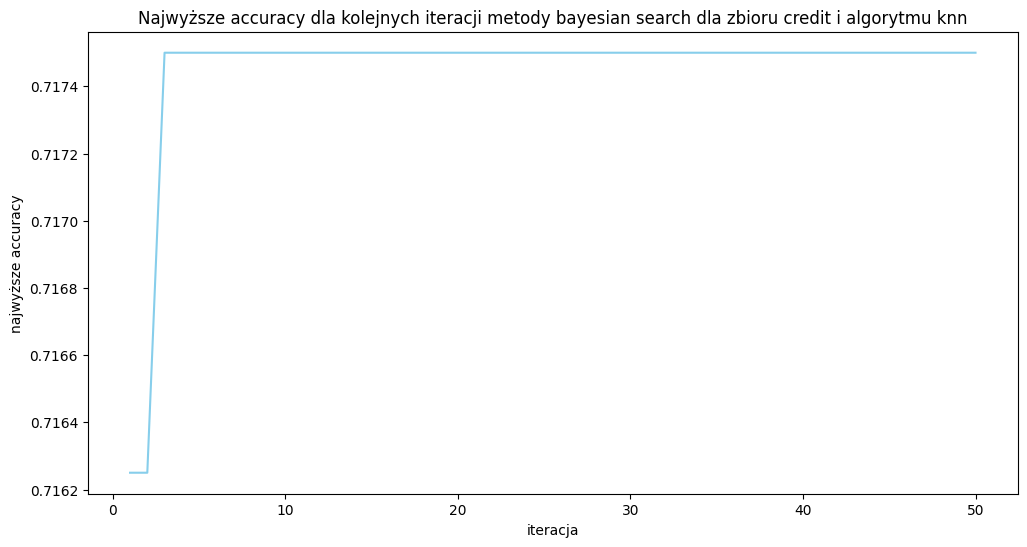

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_bayes_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

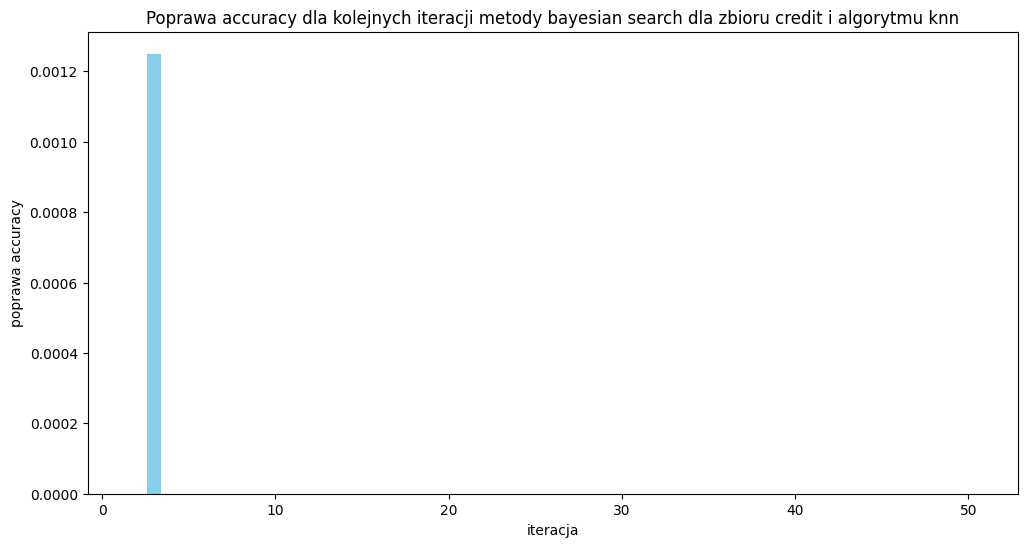

In [99]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_bayes_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [100]:
# Zbiór blood:

knn_bayes_blood_scores = []
knn_bayes_blood_params = []
knn_bayes_blood_test_accuracies = []

for state in range(123, 173):
    bayes_knn_cv = BayesSearchCV(
        pipeline_knn,
        search_spaces=bayes_knn_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_knn_cv.fit(X_train_blood, y_train_blood)
    
    knn_bayes_blood_scores.append(bayes_knn_cv.best_score_)
    knn_bayes_blood_params.append(bayes_knn_cv.best_params_)  
    
    y_pred = bayes_knn_cv.best_estimator_.predict(X_test_blood)
    test_accuracy = accuracy_score(y_test_blood, y_pred)
    knn_bayes_blood_test_accuracies.append(test_accuracy)
    
knn_bayes_blood_best_scores = np.maximum.accumulate(knn_bayes_blood_scores)
knn_bayes_blood_improvements = np.diff(knn_bayes_blood_best_scores)
knn_bayes_blood_best_score = np.max(knn_bayes_blood_scores)

print("Best Params:", knn_bayes_blood_params[np.argmax(knn_bayes_blood_scores)])
print("Best CV Score:", np.round(knn_bayes_blood_best_score, 4))
print("Test Accuracy:", np.round(knn_bayes_blood_test_accuracies[np.argmax(knn_bayes_blood_scores)], 4))

knn_bayes_blood = pd.DataFrame({'params': knn_bayes_blood_params, 'scores': knn_bayes_blood_scores})
knn_bayes_blood.to_csv("knn_bayes_blood.csv", index = False)

Best Params: OrderedDict([('classifier__n_neighbors', 25), ('classifier__p', 1), ('classifier__weights', 'uniform')])
Best CV Score: 0.8094
Test Accuracy: 0.7533


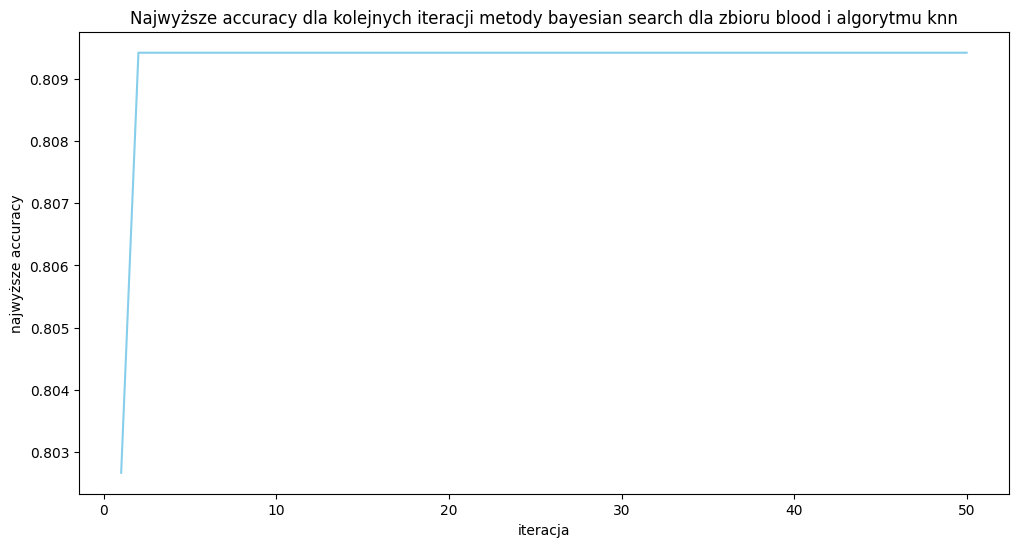

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_bayes_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

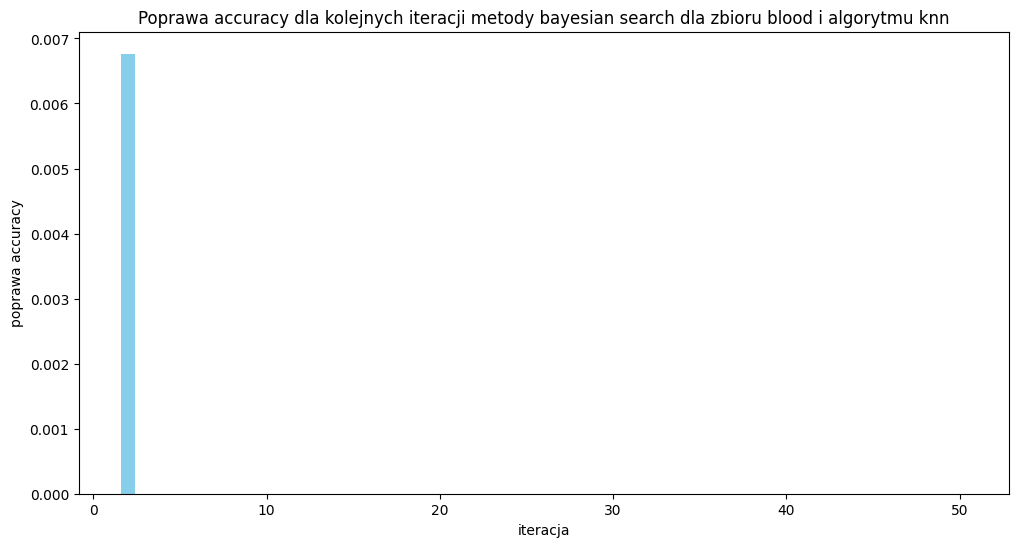

In [102]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_bayes_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [103]:
# Zbiór bank:

knn_bayes_bank_scores = []
knn_bayes_bank_params = []
knn_bayes_bank_test_accuracies = []

for state in range(123, 173):
    bayes_knn_cv = BayesSearchCV(
        pipeline_knn,
        search_spaces=bayes_knn_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_knn_cv.fit(X_train_bank, y_train_bank)
    
    knn_bayes_bank_scores.append(bayes_knn_cv.best_score_)
    knn_bayes_bank_params.append(bayes_knn_cv.best_params_)  
    
    y_pred = bayes_knn_cv.best_estimator_.predict(X_test_bank)
    test_accuracy = accuracy_score(y_test_bank, y_pred)
    knn_bayes_bank_test_accuracies.append(test_accuracy)
    
knn_bayes_bank_best_scores = np.maximum.accumulate(knn_bayes_bank_scores)
knn_bayes_bank_improvements = np.diff(knn_bayes_bank_best_scores)
knn_bayes_bank_best_score = np.max(knn_bayes_bank_scores)

print("Best Params:", knn_bayes_bank_params[np.argmax(knn_bayes_bank_scores)])
print("Best CV Score:", np.round(knn_bayes_bank_best_score, 4))
print("Test Accuracy:", np.round(knn_bayes_bank_test_accuracies[np.argmax(knn_bayes_bank_scores)], 4))

knn_bayes_bank = pd.DataFrame({'params': knn_bayes_bank_params, 'scores': knn_bayes_bank_scores})
knn_bayes_bank.to_csv("knn_bayes_bank.csv", index = False)

Best Params: OrderedDict([('classifier__n_neighbors', 14), ('classifier__p', 1), ('classifier__weights', 'distance')])
Best CV Score: 0.8866
Test Accuracy: 0.8961


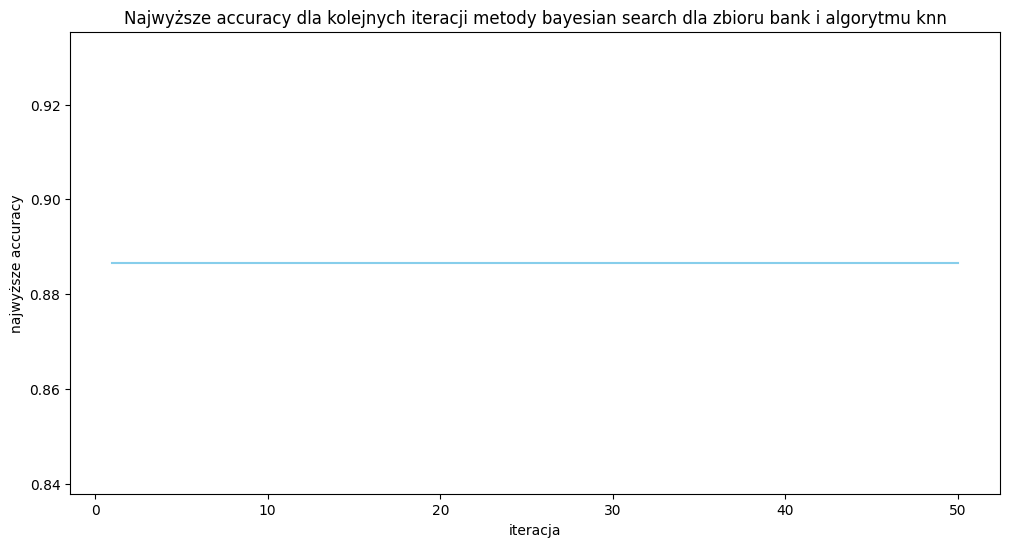

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_bayes_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

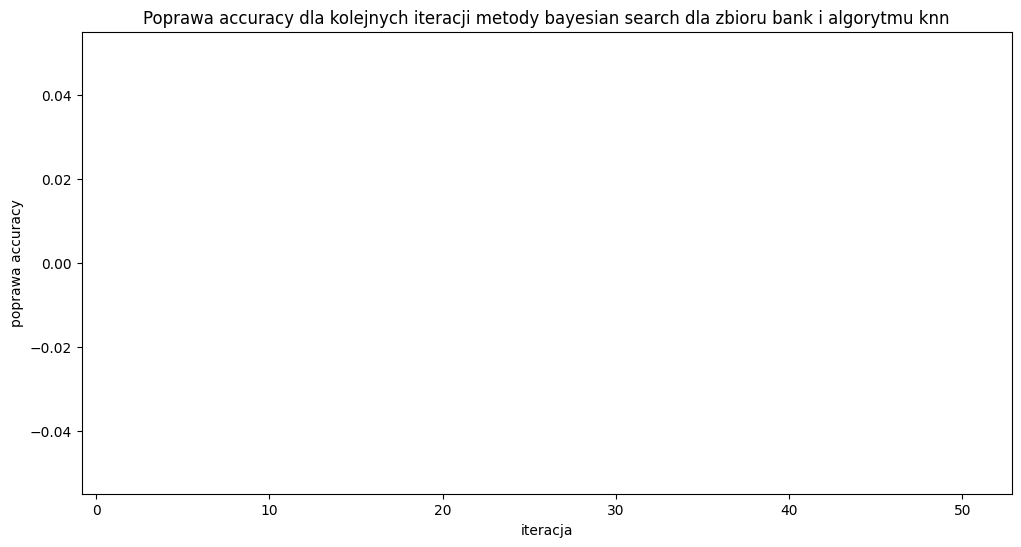

In [105]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_bayes_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

#### XGBoost

In [106]:
# Zbiór cancer:

xgb_bayes_cancer_scores = []
xgb_bayes_cancer_params = []
xgb_bayes_cancer_test_accuracies = []

for state in range(123, 173):
    bayes_xgb_cv = BayesSearchCV(
        pipeline_xgb,
        search_spaces=bayes_xgb_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_xgb_cv.fit(X_train_cancer, y_train_cancer)
    
    xgb_bayes_cancer_scores.append(bayes_xgb_cv.best_score_)
    xgb_bayes_cancer_params.append(bayes_xgb_cv.best_params_)  
    
    y_pred = bayes_xgb_cv.best_estimator_.predict(X_test_cancer)
    test_accuracy = accuracy_score(y_test_cancer, y_pred)
    xgb_bayes_cancer_test_accuracies.append(test_accuracy)
    
xgb_bayes_cancer_best_scores = np.maximum.accumulate(xgb_bayes_cancer_scores)
xgb_bayes_cancer_improvements = np.diff(xgb_bayes_cancer_best_scores)
xgb_bayes_cancer_best_score = np.max(xgb_bayes_cancer_scores)

print("Best Params:", xgb_bayes_cancer_params[np.argmax(xgb_bayes_cancer_scores)])
print("Best CV Score:", np.round(xgb_bayes_cancer_best_score, 4))
print("Test Accuracy:", np.round(xgb_bayes_cancer_test_accuracies[np.argmax(xgb_bayes_cancer_scores)], 4))

xgb_bayes_cancer = pd.DataFrame({'params': xgb_bayes_cancer_params, 'scores': xgb_bayes_cancer_scores})
xgb_bayes_cancer.to_csv("xgb_bayes_cancer.csv", index = False)

Best Params: OrderedDict([('classifier__alpha', 0.00034539150435259334), ('classifier__booster', 'dart'), ('classifier__colsample_bylevel', 0.649131270232888), ('classifier__colsample_bytree', 0.5126765230501436), ('classifier__eta', 0.09351301169311983), ('classifier__lambda', 5.697276747012637e-05), ('classifier__max_depth', 1), ('classifier__min_child_weight', 1.0), ('classifier__n_estimators', 487), ('classifier__subsample', 0.7332498866549533)])
Best CV Score: 0.9758
Test Accuracy: 0.9649


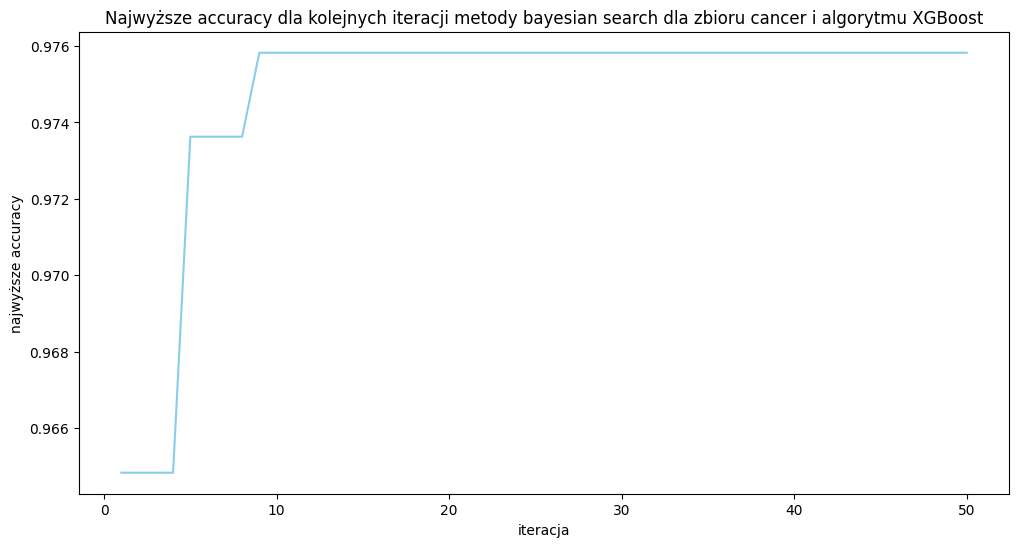

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_bayes_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

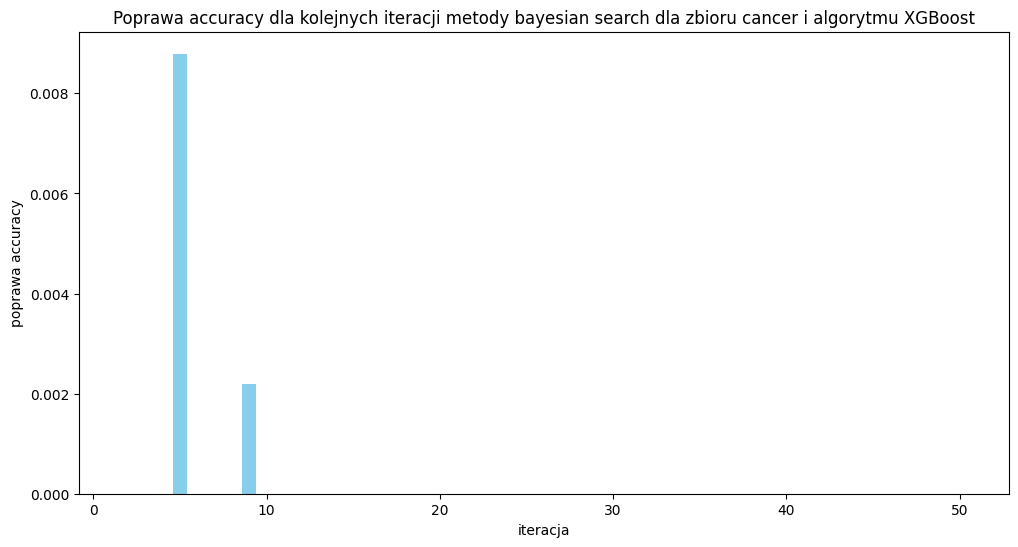

In [108]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_bayes_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [109]:
# Zbiór credit:

xgb_bayes_credit_scores = []
xgb_bayes_credit_params = []
xgb_bayes_credit_test_accuracies = []

for state in range(123, 173):
    bayes_xgb_cv = BayesSearchCV(
        pipeline_xgb,
        search_spaces=bayes_xgb_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_xgb_cv.fit(X_train_credit, y_train_credit)
    
    xgb_bayes_credit_scores.append(bayes_xgb_cv.best_score_)
    xgb_bayes_credit_params.append(bayes_xgb_cv.best_params_)  
    
    y_pred = bayes_xgb_cv.best_estimator_.predict(X_test_credit)
    test_accuracy = accuracy_score(y_test_credit, y_pred)
    xgb_bayes_credit_test_accuracies.append(test_accuracy)
    
xgb_bayes_credit_best_scores = np.maximum.accumulate(xgb_bayes_credit_scores)
xgb_bayes_credit_improvements = np.diff(xgb_bayes_credit_best_scores)
xgb_bayes_credit_best_score = np.max(xgb_bayes_credit_scores)

print("Best Params:", xgb_bayes_credit_params[np.argmax(xgb_bayes_credit_scores)])
print("Best CV Score:", np.round(xgb_bayes_credit_best_score, 4))
print("Test Accuracy:", np.round(xgb_bayes_credit_test_accuracies[np.argmax(xgb_bayes_credit_scores)], 4))

xgb_bayes_credit = pd.DataFrame({'params': xgb_bayes_credit_params, 'scores': xgb_bayes_credit_scores})
xgb_bayes_credit.to_csv("xgb_bayes_credit.csv", index = False)

Best Params: OrderedDict([('classifier__alpha', 1.0925553207054193e-05), ('classifier__booster', 'gblinear'), ('classifier__colsample_bylevel', 0.288425836351855), ('classifier__colsample_bytree', 0.08582606665390004), ('classifier__eta', 0.33811622155008575), ('classifier__lambda', 0.0018314133520209014), ('classifier__max_depth', 2), ('classifier__min_child_weight', 1201284.818273513), ('classifier__n_estimators', 401), ('classifier__subsample', 0.11416395593748624)])
Best CV Score: 0.7188
Test Accuracy: 0.685


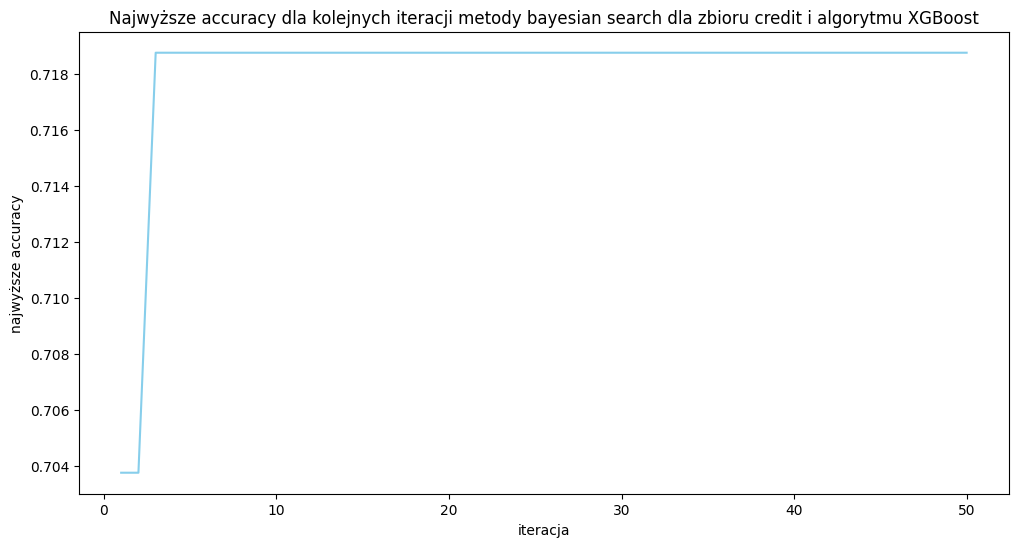

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_bayes_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

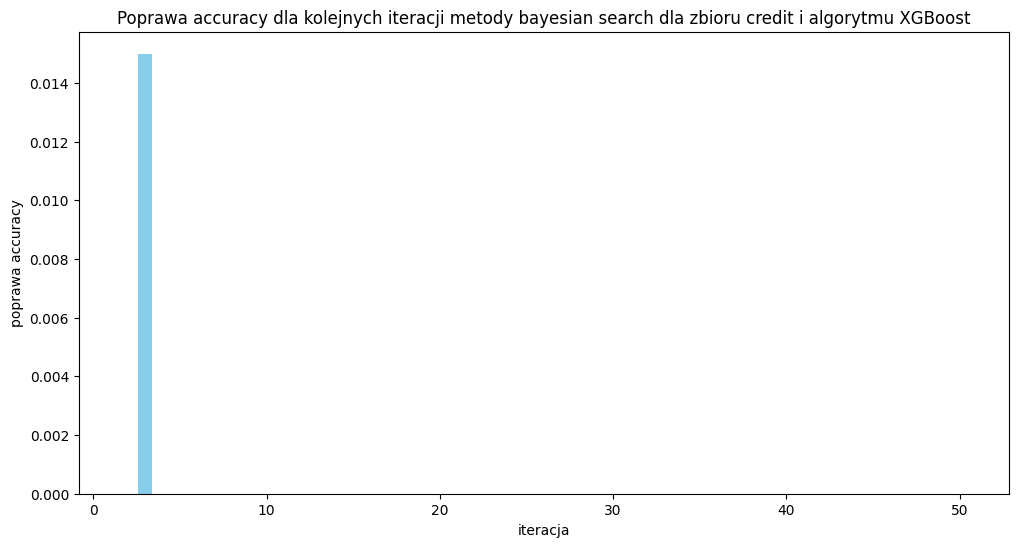

In [111]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_bayes_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [112]:
# Zbiór blood:

xgb_bayes_blood_scores = []
xgb_bayes_blood_params = []
xgb_bayes_blood_test_accuracies = []

for state in range(123, 173):
    bayes_xgb_cv = BayesSearchCV(
        pipeline_xgb,
        search_spaces=bayes_xgb_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_xgb_cv.fit(X_train_blood, y_train_blood)
    
    xgb_bayes_blood_scores.append(bayes_xgb_cv.best_score_)
    xgb_bayes_blood_params.append(bayes_xgb_cv.best_params_)  
    
    y_pred = bayes_xgb_cv.best_estimator_.predict(X_test_blood)
    test_accuracy = accuracy_score(y_test_blood, y_pred)
    xgb_bayes_blood_test_accuracies.append(test_accuracy)
    
xgb_bayes_blood_best_scores = np.maximum.accumulate(xgb_bayes_blood_scores)
xgb_bayes_blood_improvements = np.diff(xgb_bayes_blood_best_scores)
xgb_bayes_blood_best_score = np.max(xgb_bayes_blood_scores)

print("Best Params:", xgb_bayes_blood_params[np.argmax(xgb_bayes_blood_scores)])
print("Best CV Score:", np.round(xgb_bayes_blood_best_score, 4))
print("Test Accuracy:", np.round(xgb_bayes_blood_test_accuracies[np.argmax(xgb_bayes_blood_scores)], 4))

xgb_bayes_blood = pd.DataFrame({'params': xgb_bayes_blood_params, 'scores': xgb_bayes_blood_scores})
xgb_bayes_blood.to_csv("xgb_bayes_blood.csv", index = False)

Best Params: OrderedDict([('classifier__alpha', 1e-05), ('classifier__booster', 'dart'), ('classifier__colsample_bylevel', 0.13377114706963236), ('classifier__colsample_bytree', 0.9125191102093309), ('classifier__eta', 0.32126192938312154), ('classifier__lambda', 31.17708392906991), ('classifier__max_depth', 5), ('classifier__min_child_weight', 1.0), ('classifier__n_estimators', 482), ('classifier__subsample', 0.13371924259497375)])
Best CV Score: 0.796
Test Accuracy: 0.76


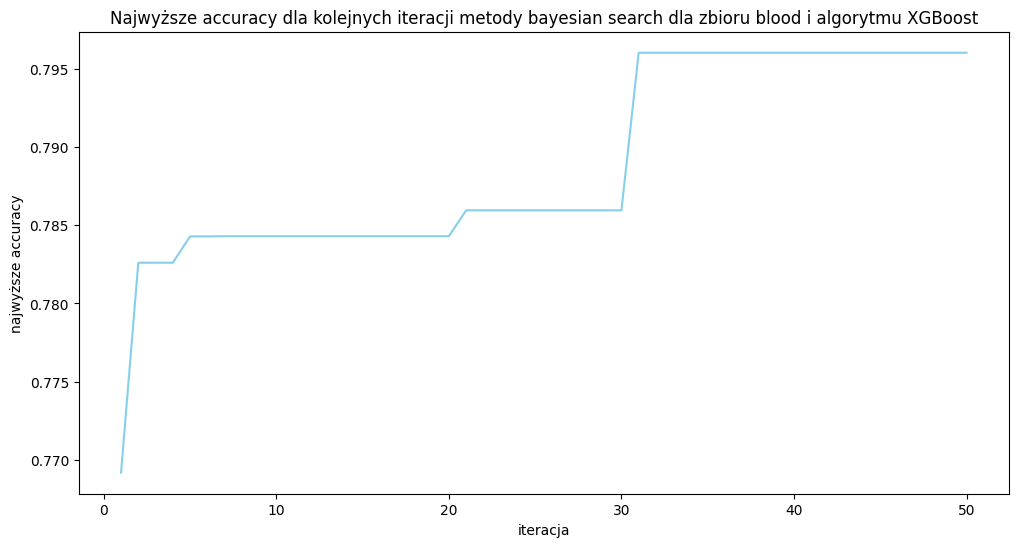

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_bayes_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

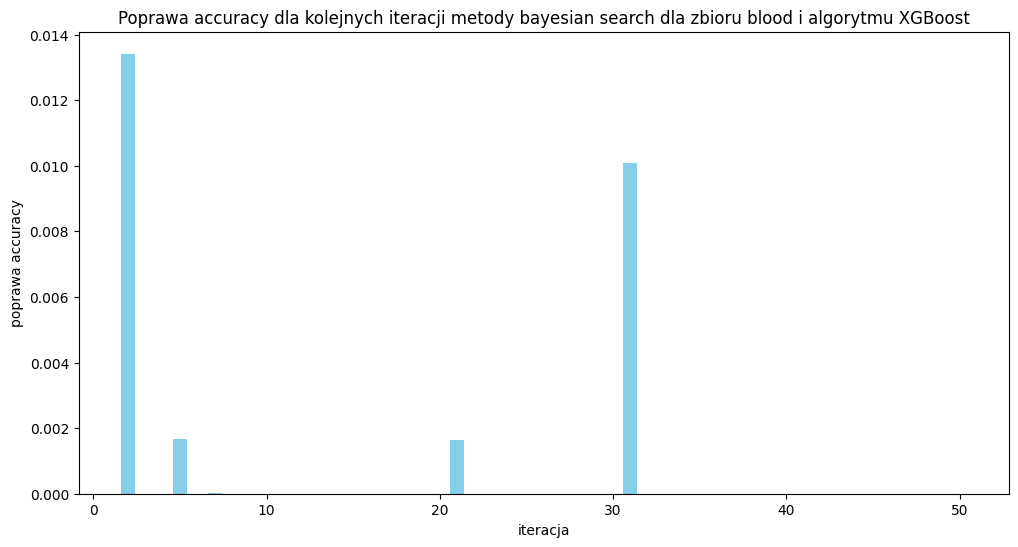

In [114]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_bayes_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [116]:
# Zbiór bank:

xgb_bayes_bank_scores = []
xgb_bayes_bank_params = []
xgb_bayes_bank_test_accuracies = []

for state in range(123, 173):
    bayes_xgb_cv = BayesSearchCV(
        pipeline_xgb,
        search_spaces=bayes_xgb_params,
        n_iter=30,
        cv=kf,
        scoring=SCORING,
        random_state=state
    )

    bayes_xgb_cv.fit(X_train_bank, y_train_bank)
    
    xgb_bayes_bank_scores.append(bayes_xgb_cv.best_score_)
    xgb_bayes_bank_params.append(bayes_xgb_cv.best_params_)  
    
    y_pred = bayes_xgb_cv.best_estimator_.predict(X_test_bank)
    test_accuracy = accuracy_score(y_test_bank, y_pred)
    xgb_bayes_bank_test_accuracies.append(test_accuracy)
    
xgb_bayes_bank_best_scores = np.maximum.accumulate(xgb_bayes_bank_scores)
xgb_bayes_bank_improvements = np.diff(xgb_bayes_bank_best_scores)
xgb_bayes_bank_best_score = np.max(xgb_bayes_bank_scores)

print("Best Params:", xgb_bayes_bank_params[np.argmax(xgb_bayes_bank_scores)])
print("Best CV Score:", np.round(xgb_bayes_bank_best_score, 4))
print("Test Accuracy:", np.round(xgb_bayes_bank_test_accuracies[np.argmax(xgb_bayes_bank_scores)], 4))

xgb_bayes_bank = pd.DataFrame({'params': xgb_bayes_bank_params, 'scores': xgb_bayes_bank_scores})
xgb_bayes_bank.to_csv("xgb_bayes_bank.csv", index = False)

Best Params: OrderedDict([('classifier__alpha', 0.9900468869101614), ('classifier__booster', 'dart'), ('classifier__colsample_bylevel', 0.7378714559388455), ('classifier__colsample_bytree', 0.0344681396386295), ('classifier__eta', 0.11732217823005396), ('classifier__lambda', 0.00010211532425267066), ('classifier__max_depth', 7), ('classifier__min_child_weight', 2.889408076273825), ('classifier__n_estimators', 341), ('classifier__subsample', 0.847521217198085)])
Best CV Score: 0.8858
Test Accuracy: 0.9028


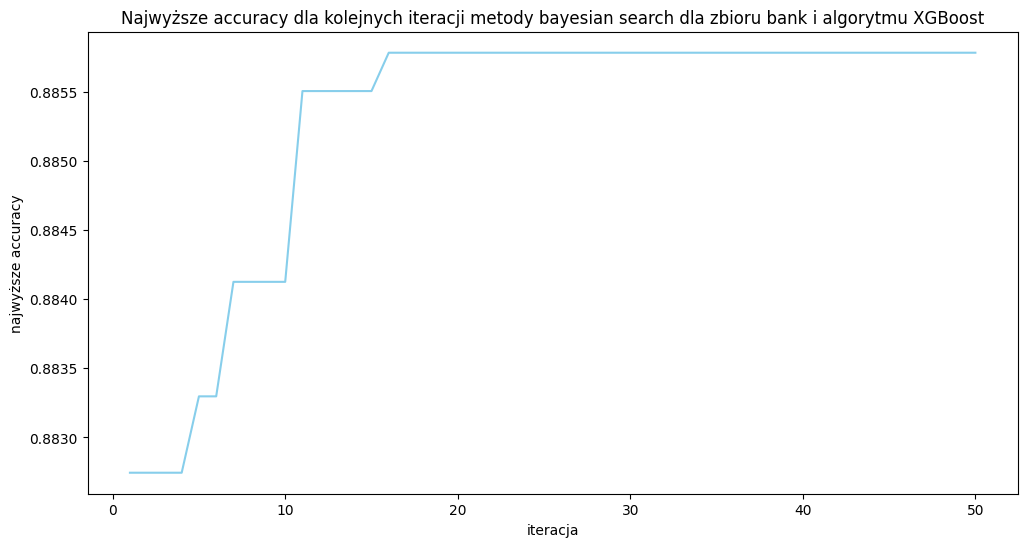

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_bayes_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

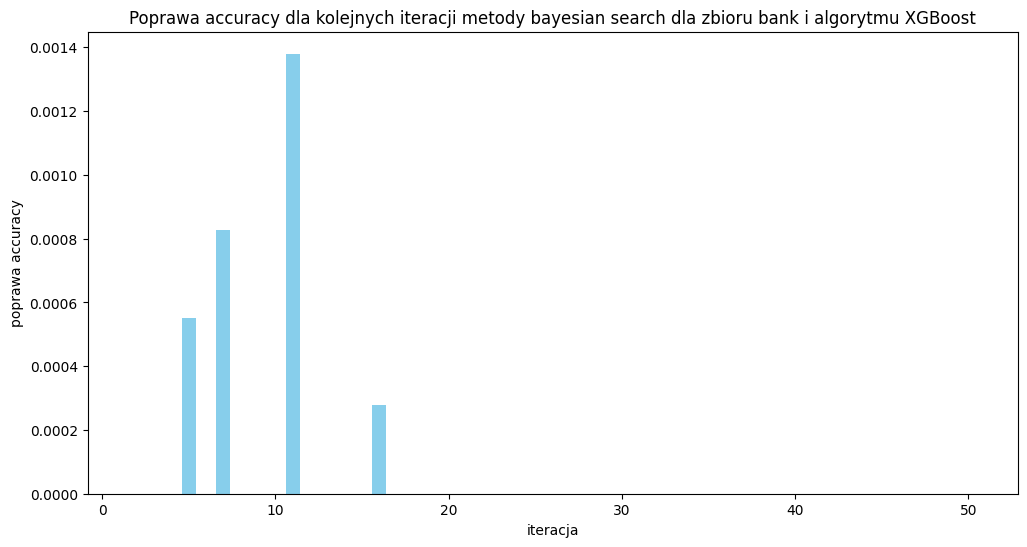

In [118]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_bayes_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody bayesian search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

### Grid Search

#### Regresja logistyczna

In [33]:
# Zbiór cancer
grid_log_cv = GridSearchCV(
    pipeline_log,
    param_grid=grid_log_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_log_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", grid_log_cv.best_params_)
print("Best CV Score:", np.round(grid_log_cv.best_score_, 4))

log_grid_cancer_best_scores = np.maximum.accumulate(grid_log_cv.cv_results_['mean_test_score'])
log_grid_cancer_improvements = np.diff(log_grid_cancer_best_scores)
log_grid_cancer_scores = grid_log_cv.cv_results_['mean_test_score']
log_grid_cancer_params = grid_log_cv.cv_results_['params']
log_grid_cancer_best_score = grid_log_cv.best_score_

y_pred = grid_log_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_grid_cancer = pd.DataFrame({'params': log_grid_cancer_params, 'scores': log_grid_cancer_scores})
log_grid_cancer.to_csv("log_grid_cancer.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__C': 100, 'classifier__l1_ratio': 0, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.9692
Test Accuracy: 0.9912


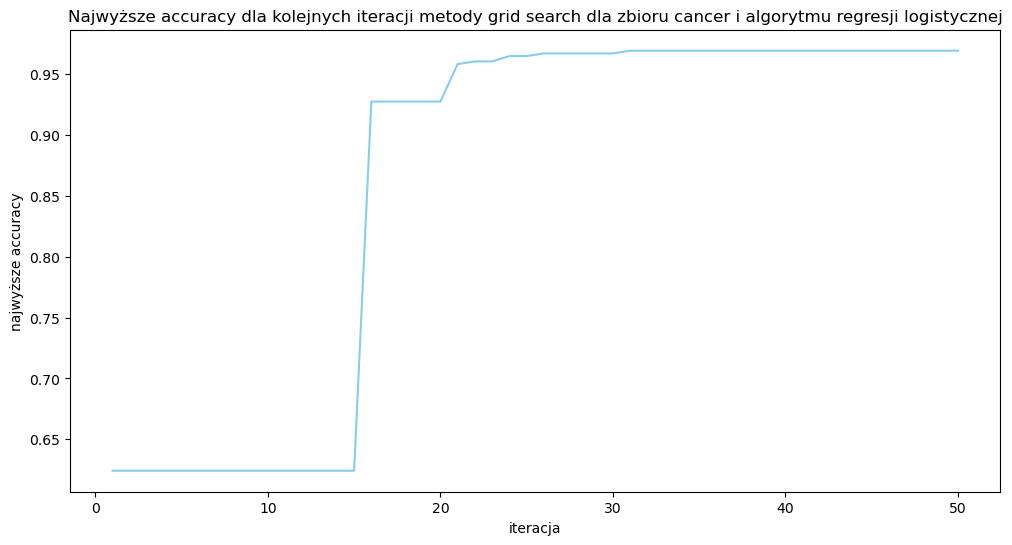

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_grid_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

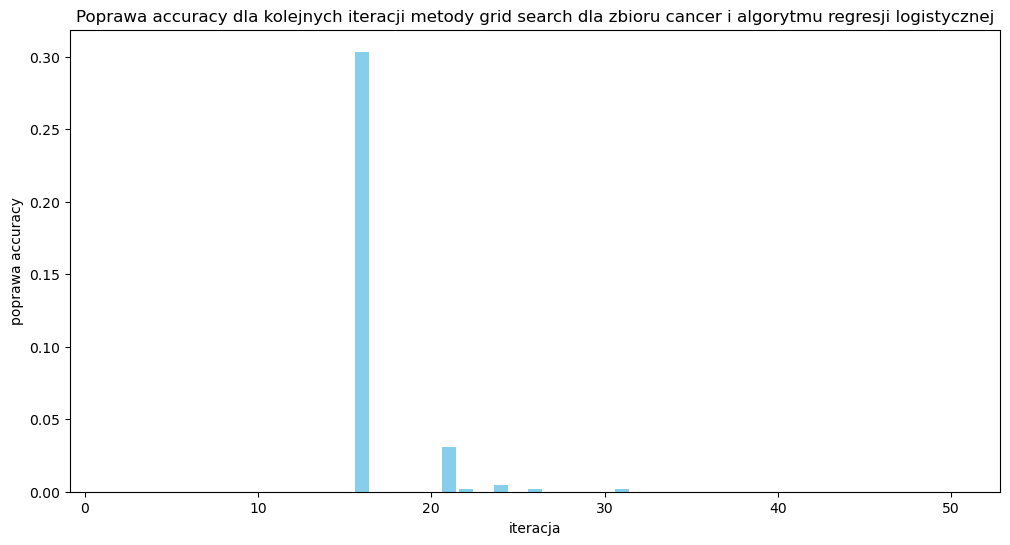

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_grid_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [36]:
# Zbiór credit
grid_log_cv = GridSearchCV(
    pipeline_log,
    param_grid=grid_log_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_log_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", grid_log_cv.best_params_)
print("Best CV Score:", np.round(grid_log_cv.best_score_, 4))

log_grid_credit_best_scores = np.maximum.accumulate(grid_log_cv.cv_results_['mean_test_score'])
log_grid_credit_improvements = np.diff(log_grid_credit_best_scores)
log_grid_credit_scores = grid_log_cv.cv_results_['mean_test_score']
log_grid_credit_params = grid_log_cv.cv_results_['params']
log_grid_credit_best_score = grid_log_cv.best_score_

y_pred = grid_log_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_grid_credit = pd.DataFrame({'params': log_grid_credit_params, 'scores': log_grid_credit_scores})
log_grid_credit.to_csv("log_grid_credit.csv", index=False)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__C': 1, 'classifier__l1_ratio': 0.2, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.72
Test Accuracy: 0.69


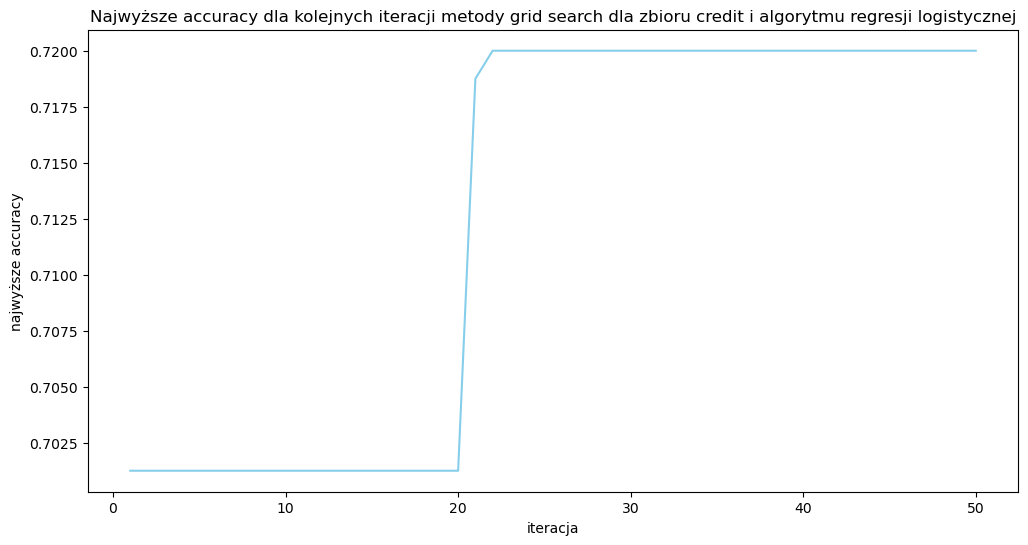

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_grid_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

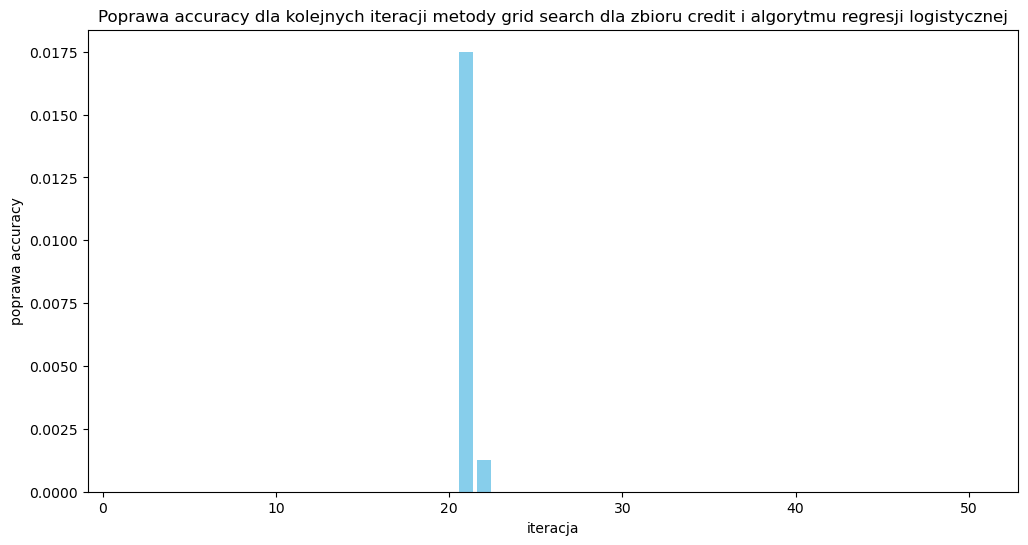

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_grid_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [39]:
# Zbiór blood
grid_log_cv = GridSearchCV(
    pipeline_log,
    param_grid=grid_log_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_log_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", grid_log_cv.best_params_)
print("Best CV Score:", np.round(grid_log_cv.best_score_, 4))

log_grid_blood_best_scores = np.maximum.accumulate(grid_log_cv.cv_results_['mean_test_score'])
log_grid_blood_improvements = np.diff(log_grid_blood_best_scores)
log_grid_blood_scores = grid_log_cv.cv_results_['mean_test_score']
log_grid_blood_params = grid_log_cv.cv_results_['params']
log_grid_blood_best_score = grid_log_cv.best_score_

y_pred = grid_log_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_grid_blood = pd.DataFrame({'params': log_grid_blood_params, 'scores': log_grid_blood_scores})
log_grid_blood.to_csv("log_grid_blood.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__C': 10, 'classifier__l1_ratio': 1, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.786
Test Accuracy: 0.72


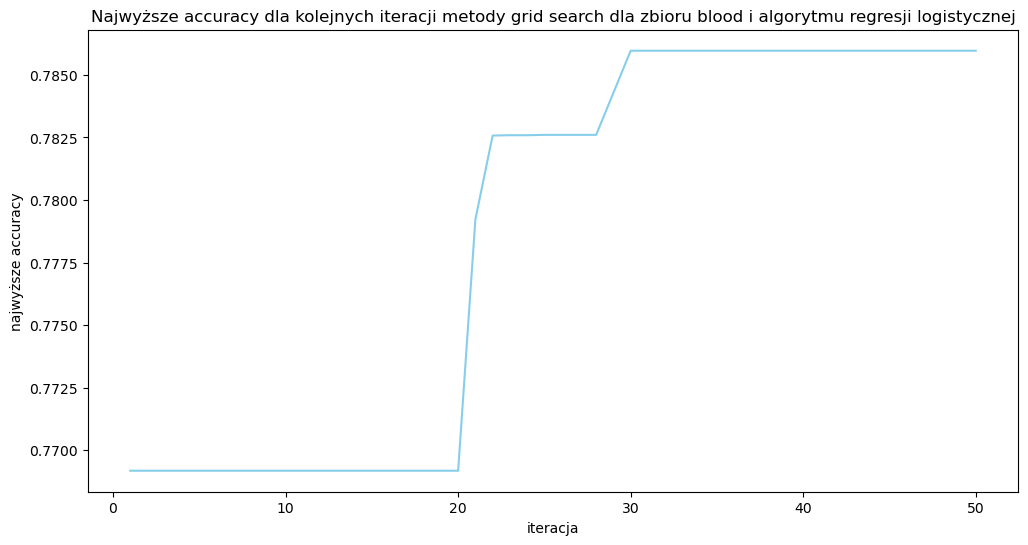

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_grid_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

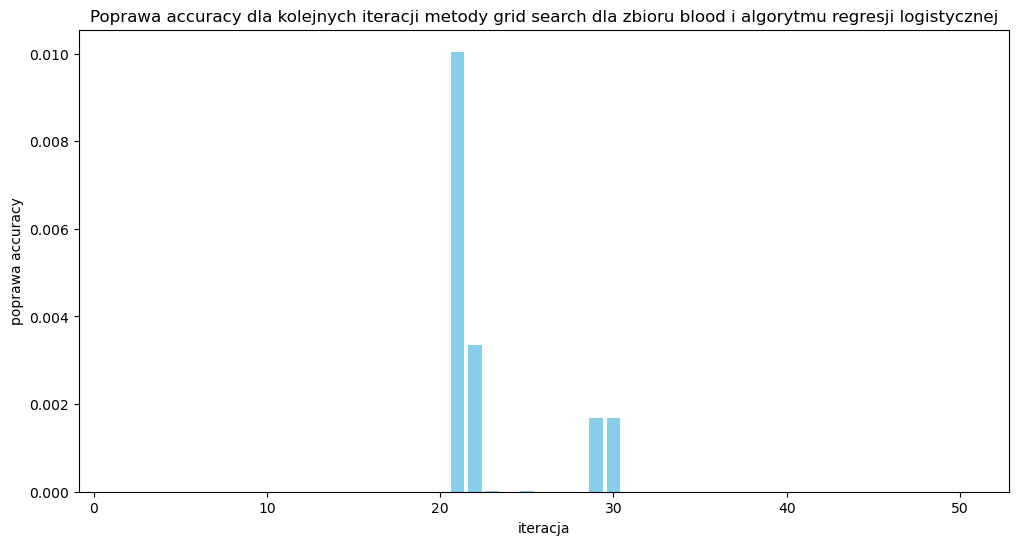

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_grid_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [42]:
# Zbiór bank
grid_log_cv = GridSearchCV(
    pipeline_log,
    param_grid=grid_log_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_log_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", grid_log_cv.best_params_)
print("Best CV Score:", np.round(grid_log_cv.best_score_, 4))

log_grid_bank_best_scores = np.maximum.accumulate(grid_log_cv.cv_results_['mean_test_score'])
log_grid_bank_improvements = np.diff(log_grid_bank_best_scores)
log_grid_bank_scores = grid_log_cv.cv_results_['mean_test_score']
log_grid_bank_params = grid_log_cv.cv_results_['params']
log_grid_bank_best_score = grid_log_cv.best_score_

y_pred = grid_log_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

log_grid_bank = pd.DataFrame({'params': log_grid_bank_params, 'scores': log_grid_bank_scores})
log_grid_bank.to_csv("log_grid_bank.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.6, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best CV Score: 0.8836
Test Accuracy: 0.895


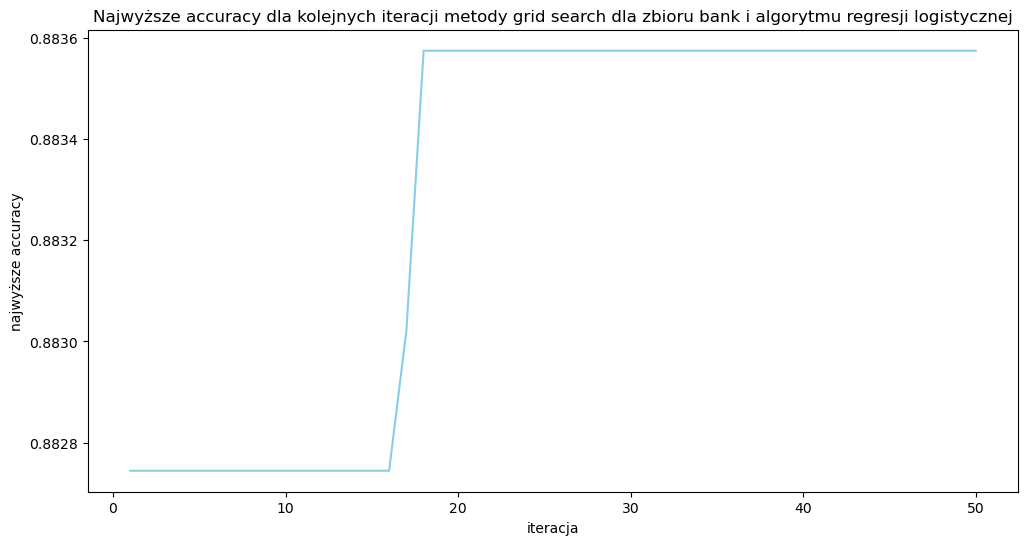

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), log_grid_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

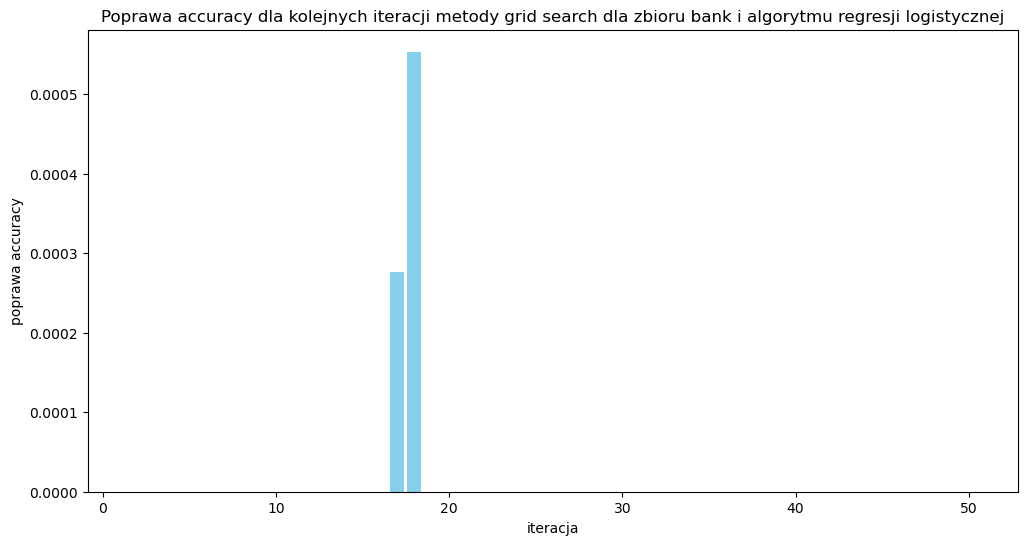

In [44]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), log_grid_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu regresji logistycznej')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

#### KNN

In [54]:
# Zbiór cancer
grid_knn_cv = GridSearchCV(
    pipeline_knn,
    param_grid=grid_knn_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_knn_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", grid_knn_cv.best_params_)
print("Best CV Score:", np.round(grid_knn_cv.best_score_, 4))

knn_grid_cancer_best_scores = np.maximum.accumulate(grid_knn_cv.cv_results_['mean_test_score'])
knn_grid_cancer_improvements = np.diff(knn_grid_cancer_best_scores)
knn_grid_cancer_scores = grid_knn_cv.cv_results_['mean_test_score']
knn_grid_cancer_params = grid_knn_cv.cv_results_['params']
knn_grid_cancer_best_score = grid_knn_cv.best_score_

y_pred = grid_knn_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_grid_cancer = pd.DataFrame({'params': knn_grid_cancer_params, 'scores': knn_grid_cancer_scores})
knn_grid_cancer.to_csv("knn_grid_cancer.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best CV Score: 0.967
Test Accuracy: 0.9737


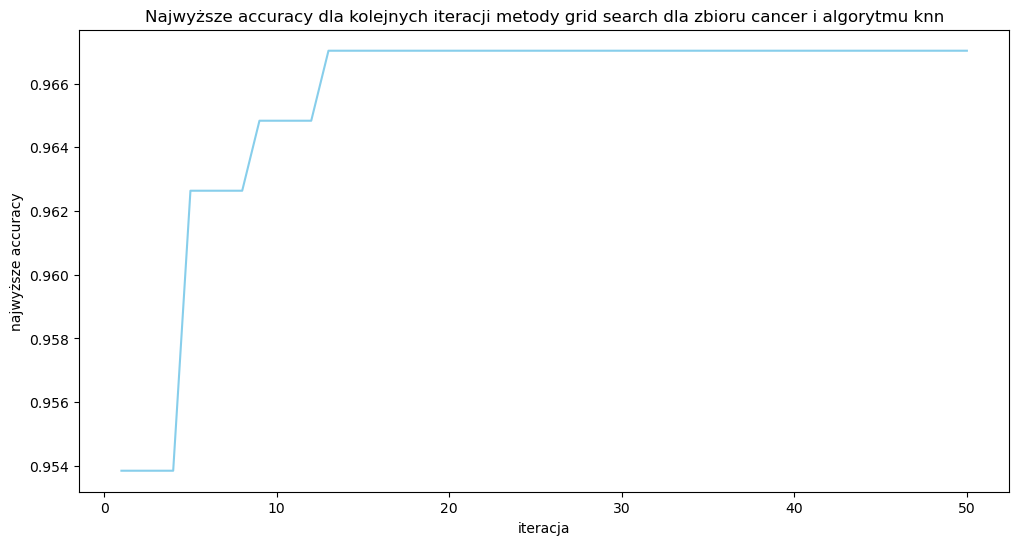

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_grid_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

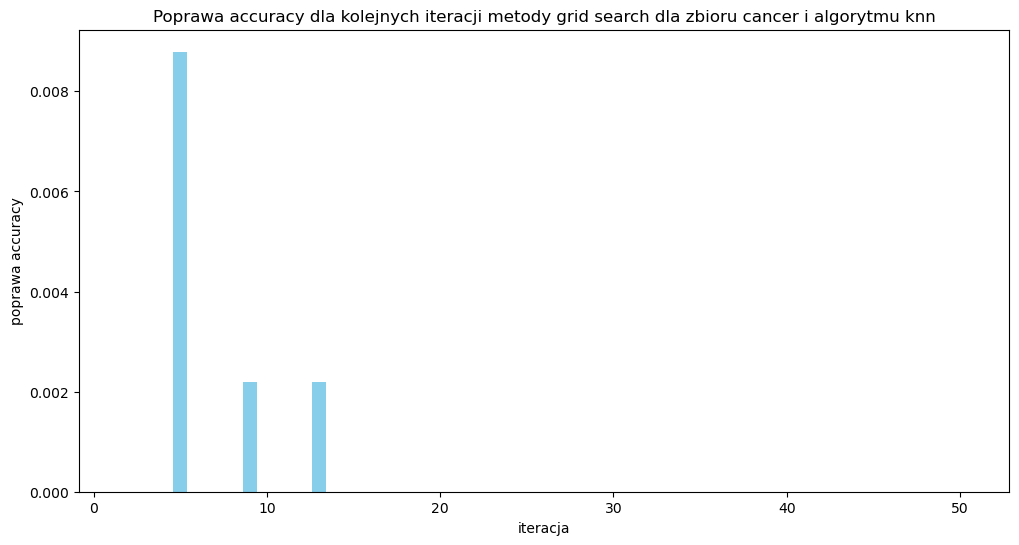

In [56]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_grid_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [57]:
# Zbiór credit
grid_knn_cv = GridSearchCV(
    pipeline_knn,
    param_grid=grid_knn_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_knn_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", grid_knn_cv.best_params_)
print("Best CV Score:", np.round(grid_knn_cv.best_score_, 4))

knn_grid_credit_best_scores = np.maximum.accumulate(grid_knn_cv.cv_results_['mean_test_score'])
knn_grid_credit_improvements = np.diff(knn_grid_credit_best_scores)
knn_grid_credit_scores = grid_knn_cv.cv_results_['mean_test_score']
knn_grid_credit_params = grid_knn_cv.cv_results_['params']
knn_grid_credit_best_score = grid_knn_cv.best_score_

y_pred = grid_knn_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_grid_credit = pd.DataFrame({'params': knn_grid_credit_params, 'scores': knn_grid_credit_scores})
knn_grid_credit.to_csv("knn_grid_credit.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__n_neighbors': 19, 'classifier__weights': 'distance'}
Best CV Score: 0.7113
Test Accuracy: 0.705


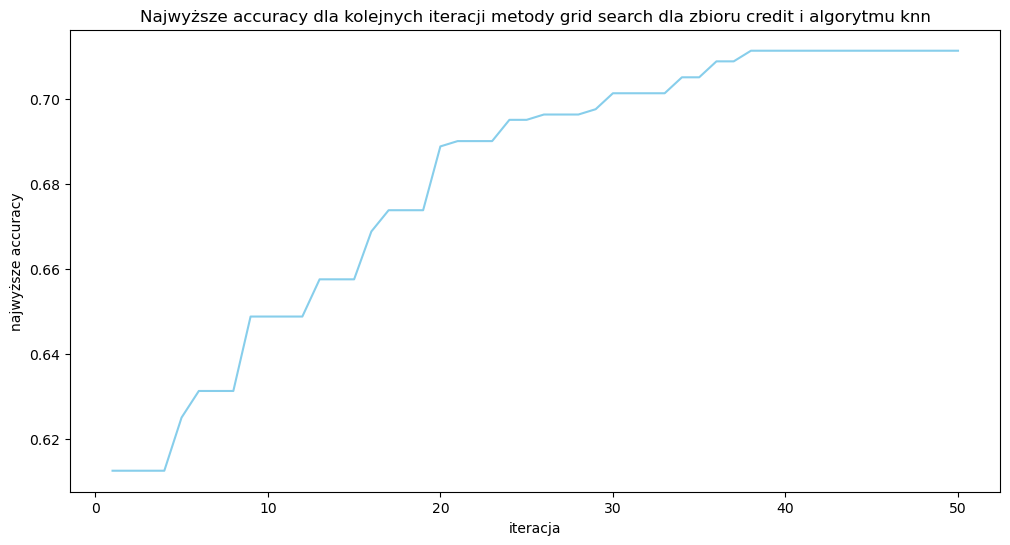

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_grid_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

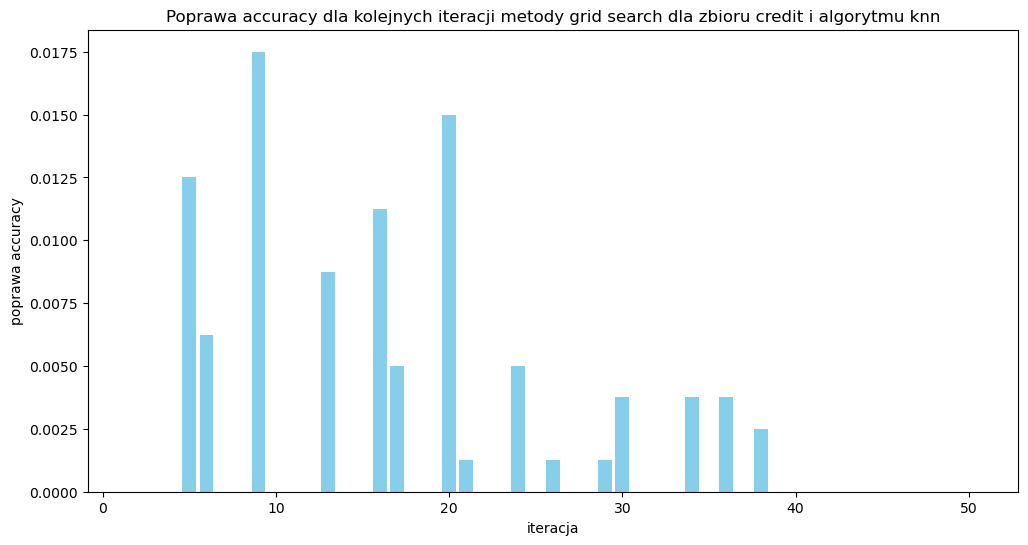

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_grid_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [60]:
# Zbiór blood
grid_knn_cv = GridSearchCV(
    pipeline_knn,
    param_grid=grid_knn_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_knn_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", grid_knn_cv.best_params_)
print("Best CV Score:", np.round(grid_knn_cv.best_score_, 4))

knn_grid_blood_best_scores = np.maximum.accumulate(grid_knn_cv.cv_results_['mean_test_score'])
knn_grid_blood_improvements = np.diff(knn_grid_blood_best_scores)
knn_grid_blood_scores = grid_knn_cv.cv_results_['mean_test_score']
knn_grid_blood_params = grid_knn_cv.cv_results_['params']
knn_grid_blood_best_score = grid_knn_cv.best_score_

y_pred = grid_knn_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_grid_blood = pd.DataFrame({'params': knn_grid_blood_params, 'scores': knn_grid_blood_scores})
knn_grid_blood.to_csv("knn_grid_blood.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}
Best CV Score: 0.8044
Test Accuracy: 0.7467


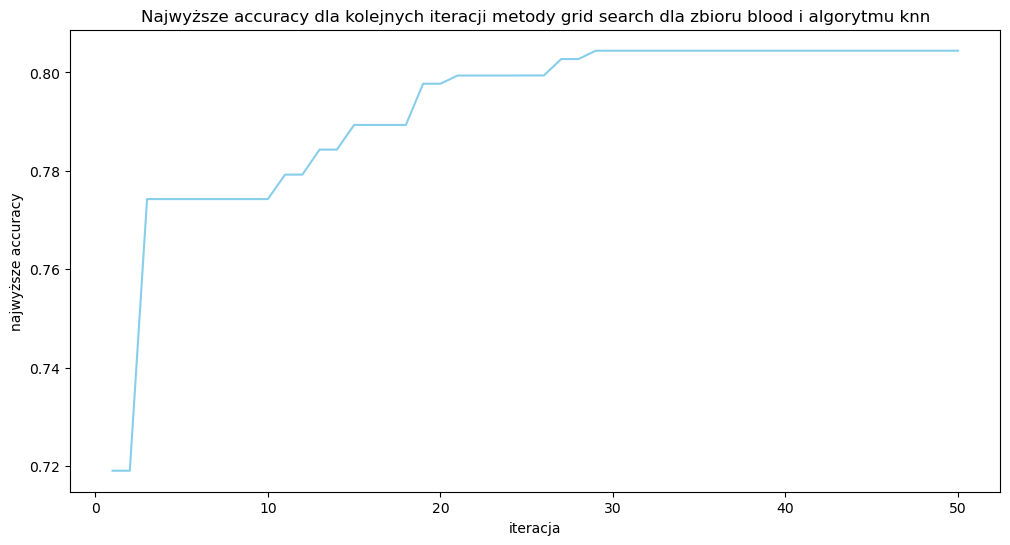

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_grid_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

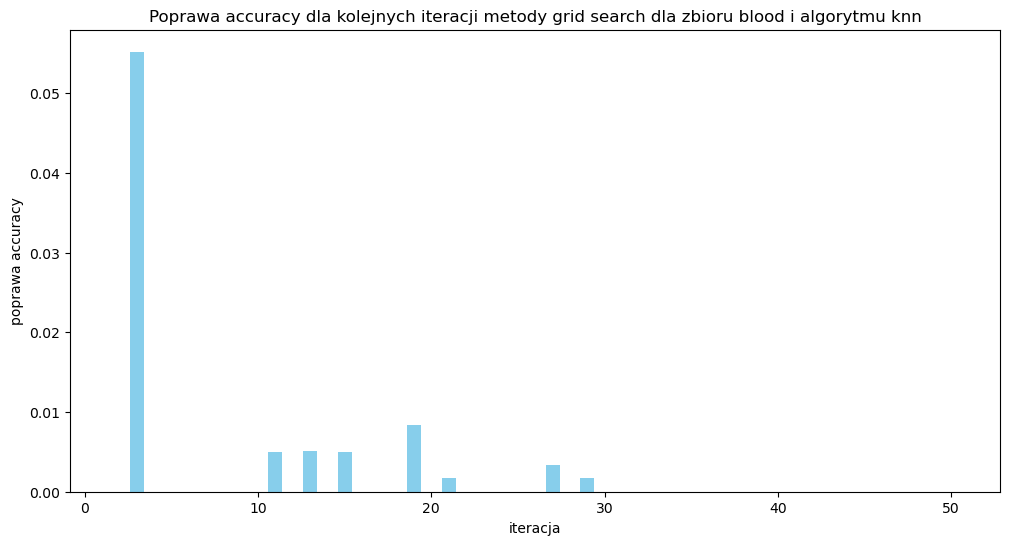

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_grid_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [63]:
# Zbiór bank
grid_knn_cv = GridSearchCV(
    pipeline_knn,
    param_grid=grid_knn_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_knn_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", grid_knn_cv.best_params_)
print("Best CV Score:", np.round(grid_knn_cv.best_score_, 4))

knn_grid_bank_best_scores = np.maximum.accumulate(grid_knn_cv.cv_results_['mean_test_score'])
knn_grid_bank_improvements = np.diff(knn_grid_bank_best_scores)
knn_grid_bank_scores = grid_knn_cv.cv_results_['mean_test_score']
knn_grid_bank_params = grid_knn_cv.cv_results_['params']
knn_grid_bank_best_score = grid_knn_cv.best_score_

y_pred = grid_knn_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

knn_grid_bank = pd.DataFrame({'params': knn_grid_bank_params, 'scores': knn_grid_bank_scores})
knn_grid_bank.to_csv("knn_grid_bank.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Best CV Score: 0.8852
Test Accuracy: 0.8983


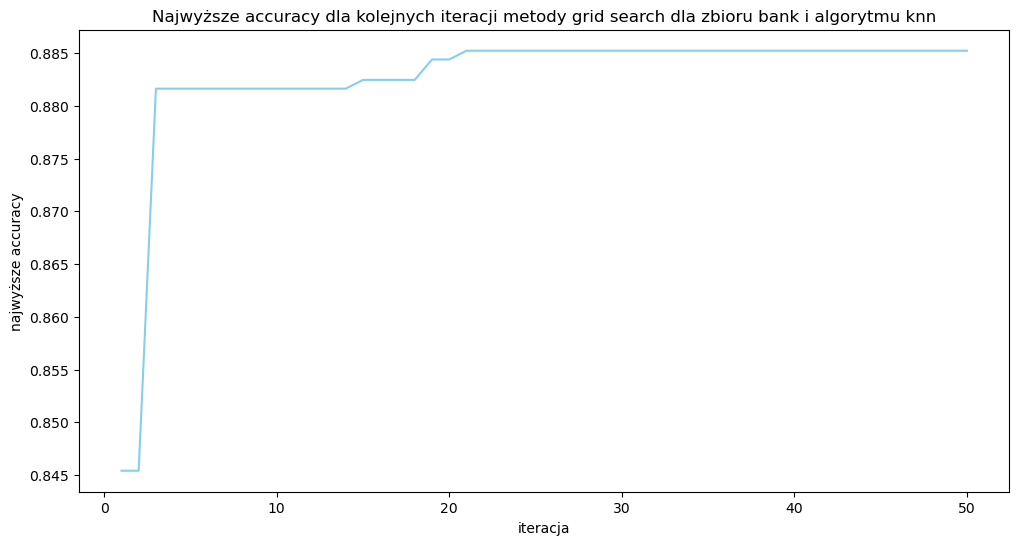

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), knn_grid_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

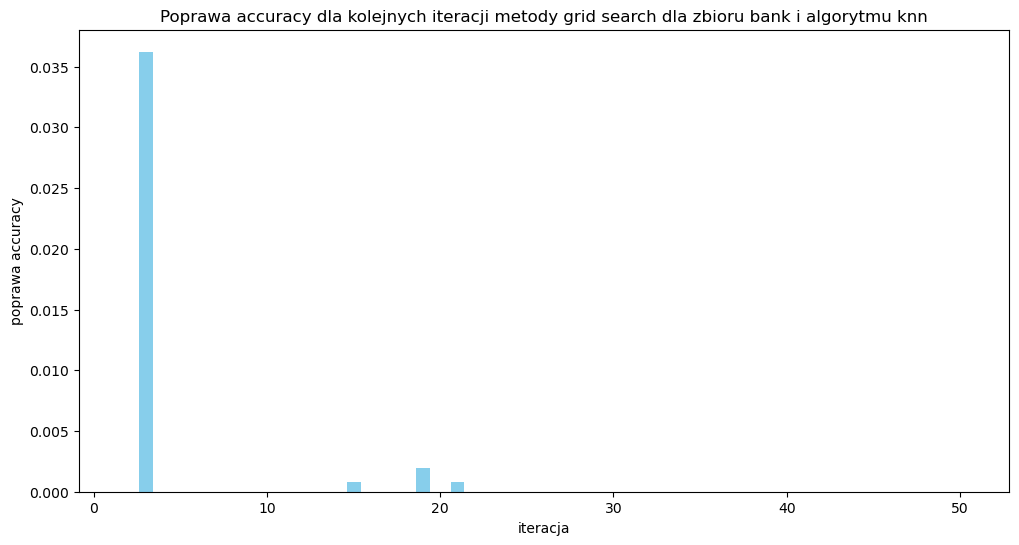

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), knn_grid_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu knn')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

#### XGBoost

In [66]:
# Zbiór cancer
grid_xgb_cv = GridSearchCV(
    pipeline_xgb,
    param_grid=grid_xgb_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_xgb_cv.fit(X_train_cancer, y_train_cancer)

print("Best Params:", grid_xgb_cv.best_params_)
print("Best CV Score:", np.round(grid_xgb_cv.best_score_, 4))

xgb_grid_cancer_best_scores = np.maximum.accumulate(grid_xgb_cv.cv_results_['mean_test_score'])
xgb_grid_cancer_improvements = np.diff(xgb_grid_cancer_best_scores)
xgb_grid_cancer_scores = grid_xgb_cv.cv_results_['mean_test_score']
xgb_grid_cancer_params = grid_xgb_cv.cv_results_['params']
xgb_grid_cancer_best_score = grid_xgb_cv.best_score_

y_pred = grid_xgb_cv.best_estimator_.predict(X_test_cancer)
test_accuracy = accuracy_score(y_test_cancer, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_grid_cancer = pd.DataFrame({'params': xgb_grid_cancer_params, 'scores': xgb_grid_cancer_scores})
xgb_grid_cancer.to_csv("xgb_grid_cancer.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__eta': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best CV Score: 0.967
Test Accuracy: 0.9649


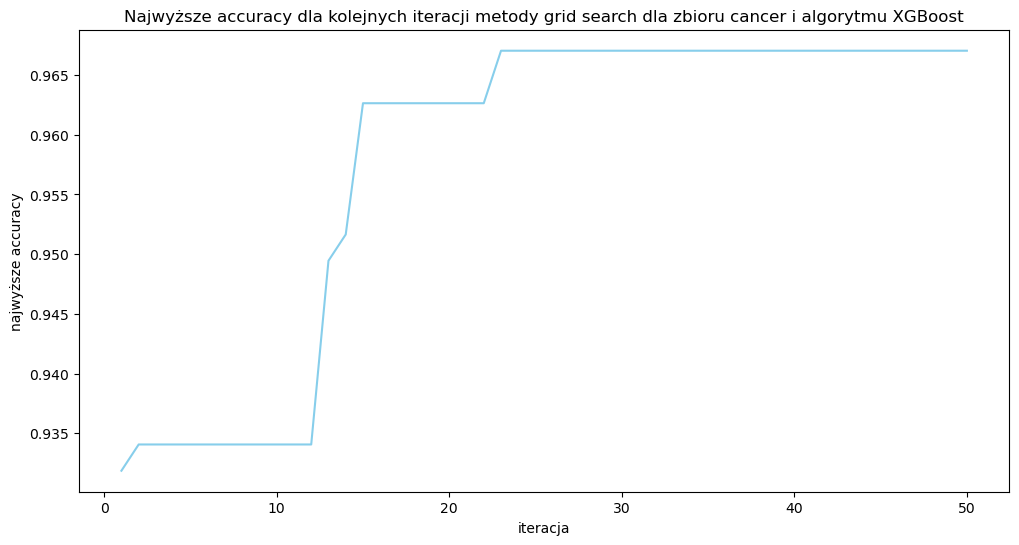

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_grid_cancer_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

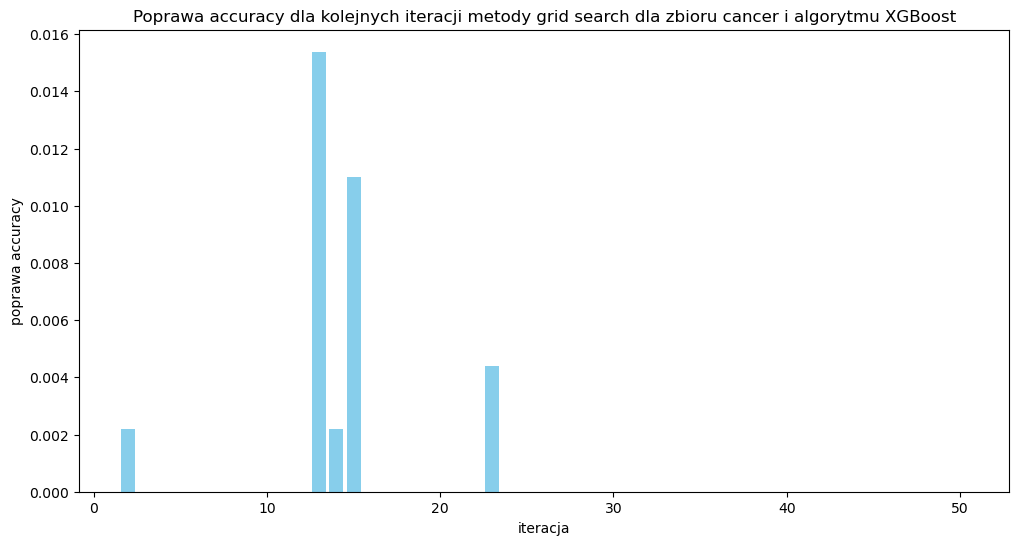

In [68]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_grid_cancer_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru cancer i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [69]:
# Zbiór credit
grid_xgb_cv = GridSearchCV(
    pipeline_xgb,
    param_grid=grid_xgb_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_xgb_cv.fit(X_train_credit, y_train_credit)

print("Best Params:", grid_xgb_cv.best_params_)
print("Best CV Score:", np.round(grid_xgb_cv.best_score_, 4))

xgb_grid_credit_best_scores = np.maximum.accumulate(grid_xgb_cv.cv_results_['mean_test_score'])
xgb_grid_credit_improvements = np.diff(xgb_grid_credit_best_scores)
xgb_grid_credit_scores = grid_xgb_cv.cv_results_['mean_test_score']
xgb_grid_credit_params = grid_xgb_cv.cv_results_['params']
xgb_grid_credit_best_score = grid_xgb_cv.best_score_

y_pred = grid_xgb_cv.best_estimator_.predict(X_test_credit)
test_accuracy = accuracy_score(y_test_credit, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_grid_credit = pd.DataFrame({'params': xgb_grid_credit_params, 'scores': xgb_grid_credit_scores})
xgb_grid_credit.to_csv("xgb_grid_credit.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__eta': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best CV Score: 0.7075
Test Accuracy: 0.72


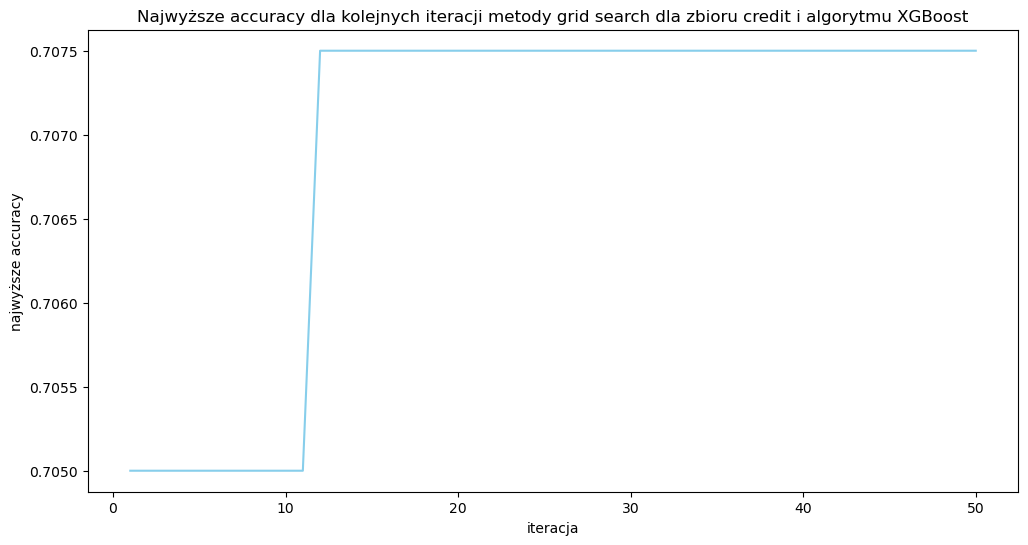

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_grid_credit_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

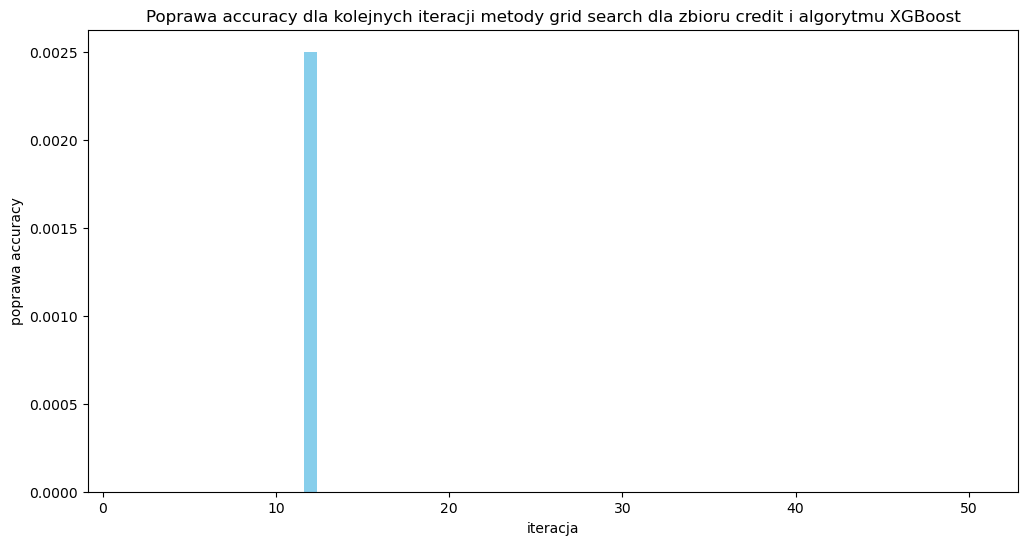

In [71]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_grid_credit_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru credit i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [72]:
# Zbiór blood
grid_xgb_cv = GridSearchCV(
    pipeline_xgb,
    param_grid=grid_xgb_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_xgb_cv.fit(X_train_blood, y_train_blood)

print("Best Params:", grid_xgb_cv.best_params_)
print("Best CV Score:", np.round(grid_xgb_cv.best_score_, 4))

xgb_grid_blood_best_scores = np.maximum.accumulate(grid_xgb_cv.cv_results_['mean_test_score'])
xgb_grid_blood_improvements = np.diff(xgb_grid_blood_best_scores)
xgb_grid_blood_scores = grid_xgb_cv.cv_results_['mean_test_score']
xgb_grid_blood_params = grid_xgb_cv.cv_results_['params']
xgb_grid_blood_best_score = grid_xgb_cv.best_score_

y_pred = grid_xgb_cv.best_estimator_.predict(X_test_blood)
test_accuracy = accuracy_score(y_test_blood, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_grid_blood = pd.DataFrame({'params': xgb_grid_blood_params, 'scores': xgb_grid_blood_scores})
xgb_grid_blood.to_csv("xgb_grid_blood.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__eta': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best CV Score: 0.7994
Test Accuracy: 0.7533


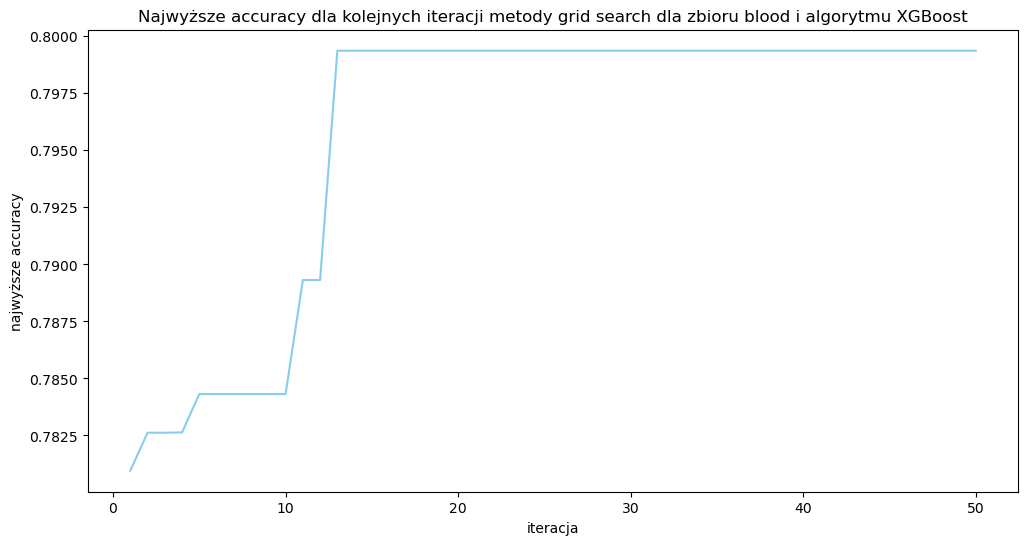

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_grid_blood_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

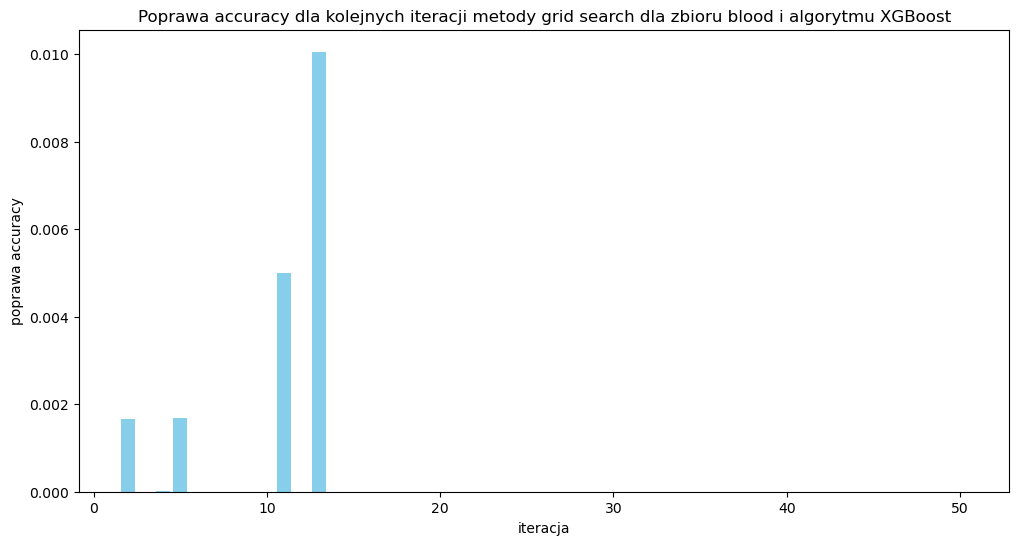

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_grid_blood_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru blood i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()

In [75]:
# Zbiór bank
grid_xgb_cv = GridSearchCV(
    pipeline_xgb,
    param_grid=grid_xgb_params,
    cv=kf,
    scoring=SCORING,
    verbose=1,
    n_jobs=-1
)

grid_xgb_cv.fit(X_train_bank, y_train_bank)

print("Best Params:", grid_xgb_cv.best_params_)
print("Best CV Score:", np.round(grid_xgb_cv.best_score_, 4))

xgb_grid_bank_best_scores = np.maximum.accumulate(grid_xgb_cv.cv_results_['mean_test_score'])
xgb_grid_bank_improvements = np.diff(xgb_grid_bank_best_scores)
xgb_grid_bank_scores = grid_xgb_cv.cv_results_['mean_test_score']
xgb_grid_bank_params = grid_xgb_cv.cv_results_['params']
xgb_grid_bank_best_score = grid_xgb_cv.best_score_

y_pred = grid_xgb_cv.best_estimator_.predict(X_test_bank)
test_accuracy = accuracy_score(y_test_bank, y_pred)
print("Test Accuracy:", np.round(test_accuracy, 4))

xgb_grid_bank = pd.DataFrame({'params': xgb_grid_bank_params, 'scores': xgb_grid_bank_scores})
xgb_grid_bank.to_csv("xgb_grid_bank.csv", index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'classifier__eta': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 400}
Best CV Score: 0.8852
Test Accuracy: 0.8961


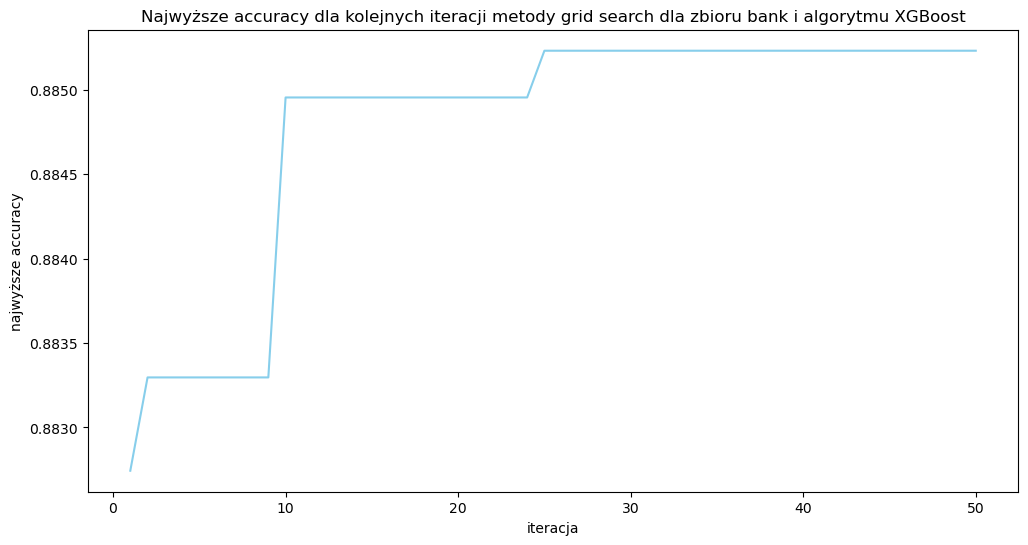

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 51), xgb_grid_bank_best_scores, color='skyblue')

plt.title('Najwyższe accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('najwyższe accuracy')

plt.show()

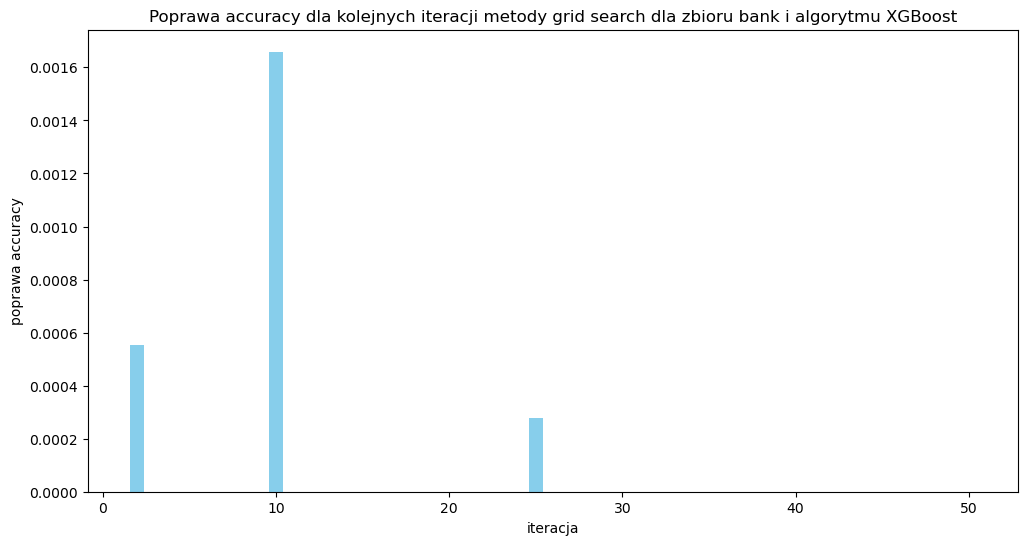

In [77]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(2, 51), xgb_grid_bank_improvements, color='skyblue')

plt.title('Poprawa accuracy dla kolejnych iteracji metody grid search dla zbioru bank i algorytmu XGBoost')
plt.xlabel('iteracja')
plt.ylabel('poprawa accuracy')

plt.show()